In [1]:
import pandas as pd

# Carregar os dados
file_path = 'AirQuality.csv'
data = pd.read_csv(file_path, sep=';', decimal=',')

# Exibir as primeiras cinco linhas do DataFrame
data.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0.7255          NaN          NaN  
2  11.9  54.0  0.7502          NaN          NaN  
3  11.0  60.0  0.7867          NaN          NaN  
4  11.2  59.6  0.7888          NaN          NaN

In [2]:
# Imprimir os nomes das colunas
print(data.columns)

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')


In [3]:
# Remover colunas desnecessárias
# data.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1, inplace=True)
# Verificar os tipos de dados
print(data.dtypes)

# Contar valores faltantes em cada coluna
print(data.isna().sum())

# Conversão de tipos de dados, se necessário
# Por exemplo, se a coluna 'Time' precisa ser convertida:
# data['Time'] = pd.to_datetime(data['Time'], format='%H.%M.%S').dt.time

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object
Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64


In [3]:
# Remover colunas desnecessárias
data.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1, inplace=True)
# Verificar os tipos de dados
print(data.dtypes)

# Contar valores faltantes em cada coluna
print(data.isna().sum())

# Conversão de tipos de dados, se necessário
# Por exemplo, se a coluna 'Time' precisa ser convertida:
# data['Time'] = pd.to_datetime(data['Time'], format='%H.%M.%S').dt.time

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object
Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64


# Substituir vírgulas por pontos e converter para float
def convert_to_float(value):
    try:
        return float(str(value).replace(',', '.'))
    except ValueError:
        return np.nan

for col in ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']:
    data[col] = data[col].apply(convert_to_float)

# Converter 'Date' para datetime especificando o formato
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Converter 'Time' para formato de hora
data['Time'] = pd.to_datetime(data['Time'], format='%H.%M.%S').dt.time


In [4]:
# Remover linhas com valores faltantes
data.dropna(inplace=True)

In [5]:
# Estatísticas resumidas
print(data.describe())

            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200

In [6]:
# Verificar os tipos de dados
print(data.dtypes)

# Contar valores faltantes em cada coluna
print(data.isna().sum())

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200

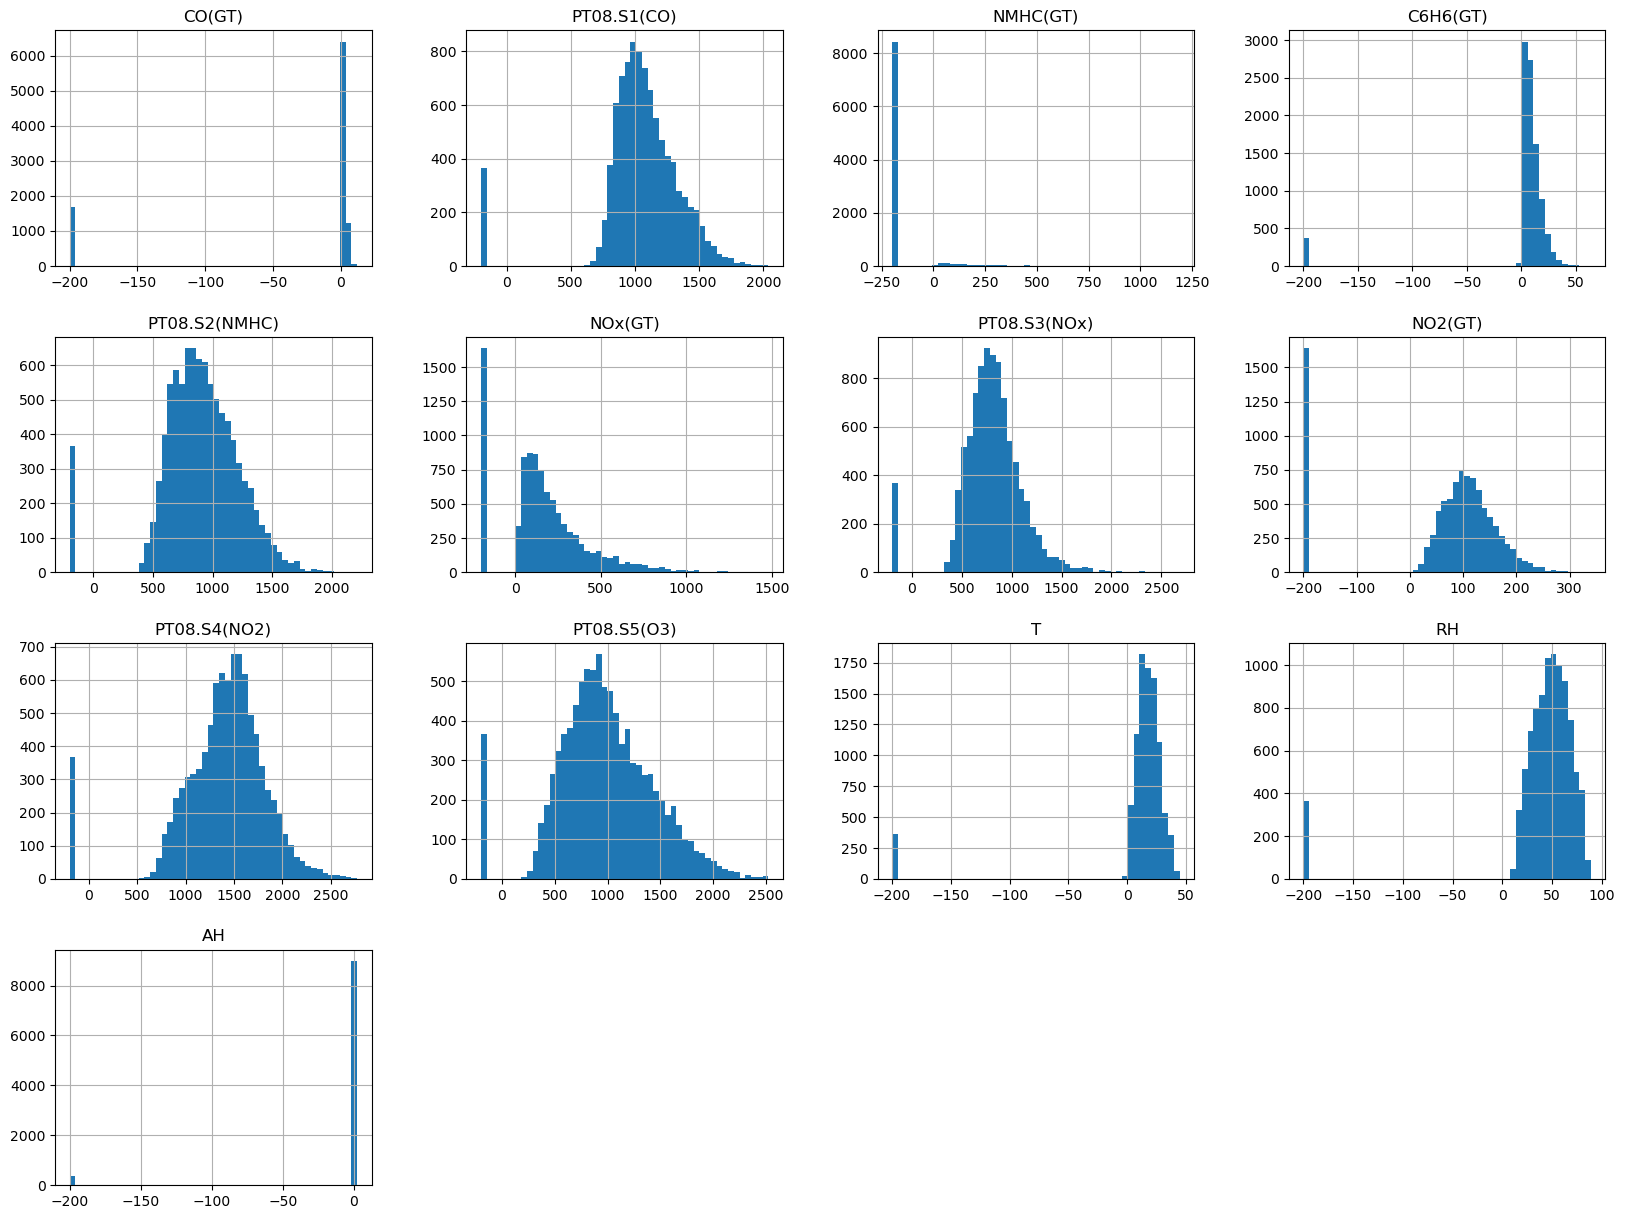

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estatísticas resumidas
print(data.describe())

# Histogramas para cada coluna
data.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

data['Time'] = pd.to_datetime(data['Time'], format='%H.%M.%S').dt.time

data['Hour'] = data['Time'].apply(lambda t: t.hour)
data['DayOfWeek'] = data['Date'].dt.dayofweek

In [9]:
import numpy as np

# Excluir colunas não numéricas antes de calcular a mediana
numeric_cols = data.select_dtypes(include=[np.number])
median_values = numeric_cols.median()

# Substituir -200 por NaN
data.replace(-200, np.nan, inplace=True)

# Substituir NaNs pela mediana nas colunas numéricas
data.fillna(median_values, inplace=True)

In [10]:
print(data.describe())

                                Date       CO(GT)  PT08.S1(CO)     NMHC(GT)  \
count                           9357  9357.000000  9357.000000  9357.000000   
mean   2004-09-21 04:30:05.193972480     2.035343  1098.001282  -159.090093   
min              2004-03-10 00:00:00     0.100000   647.000000  -200.000000   
25%              2004-06-16 00:00:00     1.200000   941.000000  -200.000000   
50%              2004-09-21 00:00:00     1.500000  1053.000000  -200.000000   
75%              2004-12-28 00:00:00     2.600000  1221.000000  -200.000000   
max              2005-04-04 00:00:00    11.900000  2040.000000  1189.000000   
std                              NaN     1.339737   212.985308   139.789093   

          C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)      NO2(GT)  \
count  9357.000000    9357.000000  9357.000000   9357.000000  9357.000000   
mean      9.997713     937.426312   228.347547    833.870578   110.092017   
min       0.100000     383.000000     2.000000    322.000

In [11]:
print("Número de linhas após remover NaNs:", len(data))

Número de linhas após remover NaNs: 9357


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(['Date', 'Time'], axis=1))

# Converta de volta para DataFrame se necessário
scaled_data_df = pd.DataFrame(scaled_data, columns=data.columns[2:])

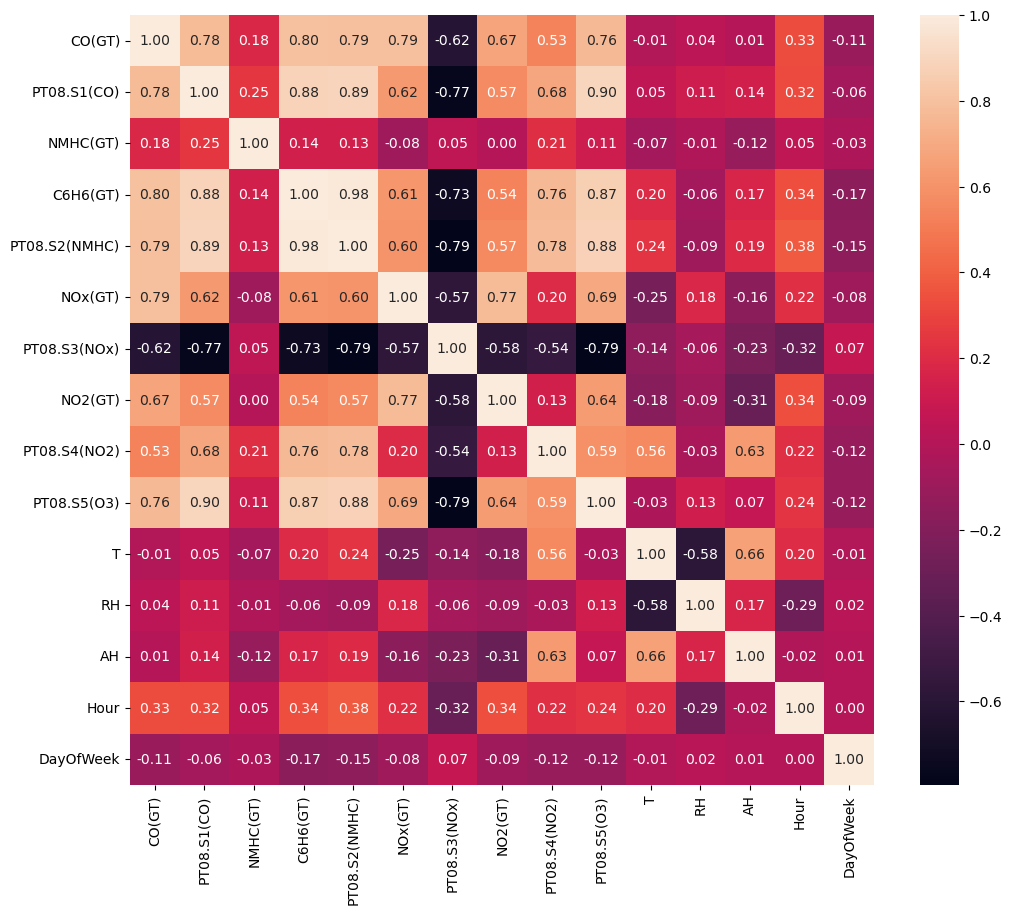

In [13]:
# Selecionar apenas colunas numéricas
numeric_data = data.select_dtypes(include=[np.number])

# Calcular a matriz de correlação apenas para colunas numéricas
correlation_matrix = numeric_data.corr()

# Criar o mapa de calor usando Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

In [14]:
# Calcular a matriz de correlação
corr_matrix = numeric_data.corr()

# Ignorar a diagonal principal e duplicatas
corr_matrix = corr_matrix.unstack().drop_duplicates()
corr_matrix = corr_matrix[corr_matrix.index.get_level_values(0) != corr_matrix.index.get_level_values(1)]

# Ordenar por valor absoluto para obter as maiores correlações (positivas ou negativas)
sorted_corr = corr_matrix.reindex(corr_matrix.abs().sort_values(ascending=False).index)

# Exibir as maiores correlações positivas e negativas
print("Maiores Correlações Positivas:")
print(sorted_corr[sorted_corr > 0].head())  # Altere .head() para exibir mais ou menos resultados

print("\nMaiores Correlações Negativas:")
print(sorted_corr[sorted_corr < 0].head())  # Altere .head() para exibir mais ou menos resultados

Maiores Correlações Positivas:
C6H6(GT)       PT08.S2(NMHC)    0.981673
PT08.S1(CO)    PT08.S5(O3)      0.899493
               PT08.S2(NMHC)    0.893070
               C6H6(GT)         0.883979
PT08.S2(NMHC)  PT08.S5(O3)      0.880710
dtype: float64

Maiores Correlações Negativas:
PT08.S2(NMHC)  PT08.S3(NOx)   -0.794826
PT08.S3(NOx)   PT08.S5(O3)    -0.794240
PT08.S1(CO)    PT08.S3(NOx)   -0.769482
C6H6(GT)       PT08.S3(NOx)   -0.732289
CO(GT)         PT08.S3(NOx)   -0.618222
dtype: float64


In [15]:
# Selecionar as variáveis relevantes
features = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S4(NO2)', 'T', 'RH', 'AH', 'Hour', 'DayOfWeek']
target = 'NOx(GT)'

# Criar o DataFrame final com as variáveis selecionadas
final_data = data[features + [target]]

In [16]:
from sklearn.model_selection import train_test_split

# Dividir o conjunto de dados em treino e teste (70% treino, 30% teste)
train_data, test_data = train_test_split(final_data, test_size=0.3, random_state=42)

In [17]:
# Salvar os conjuntos de dados de treino e teste
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

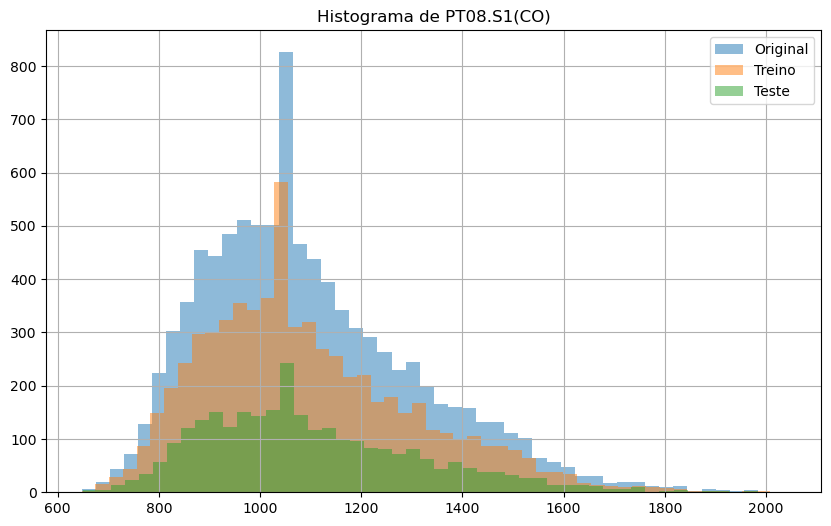

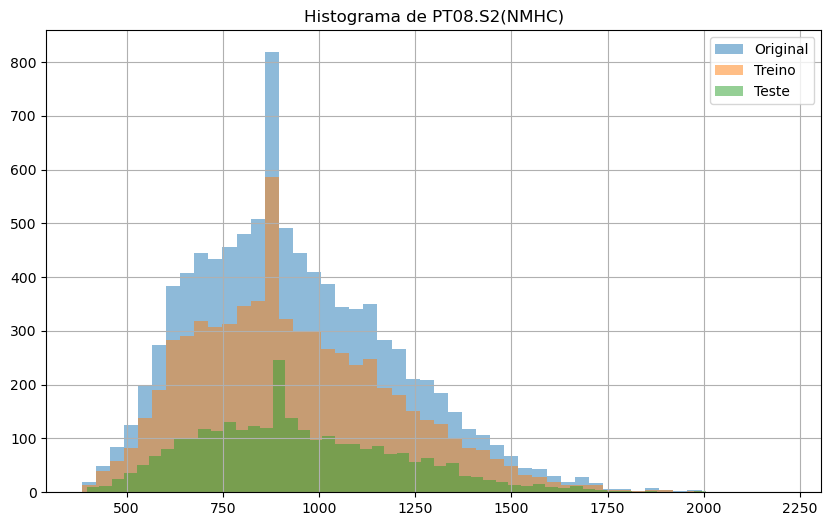

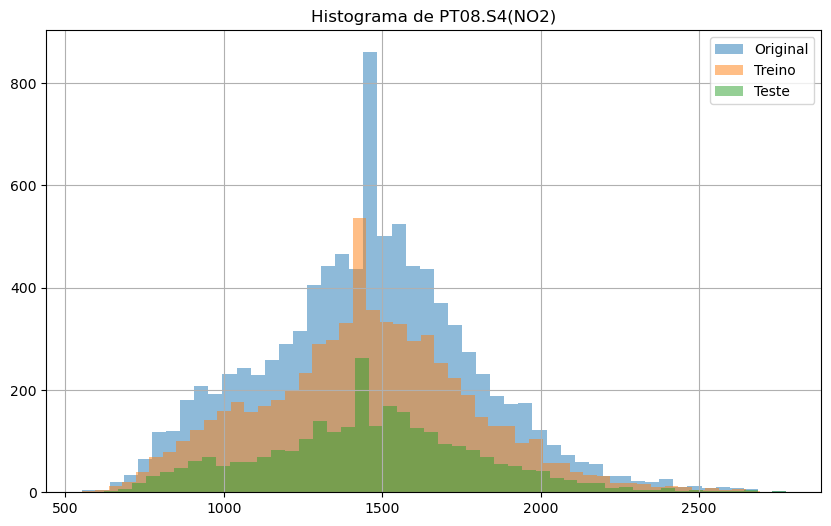

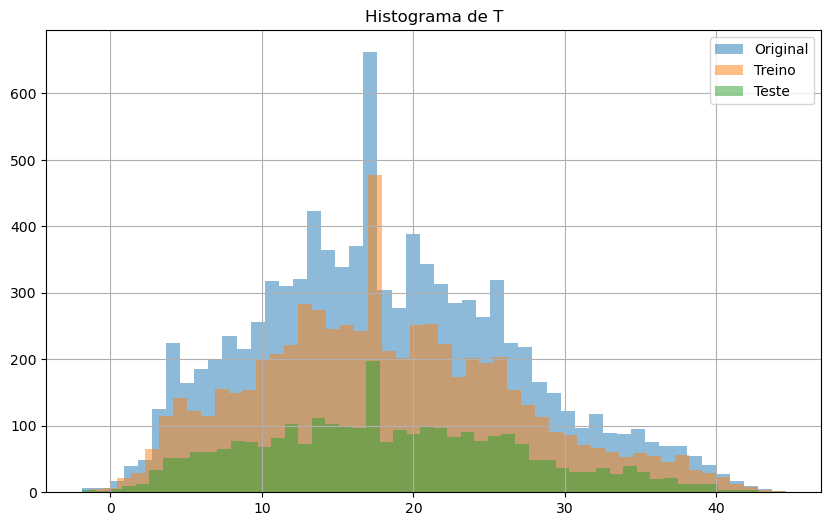

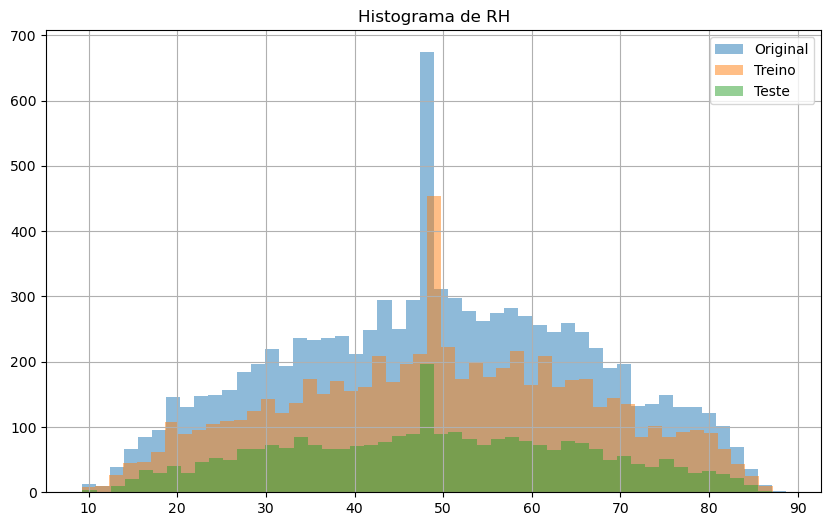

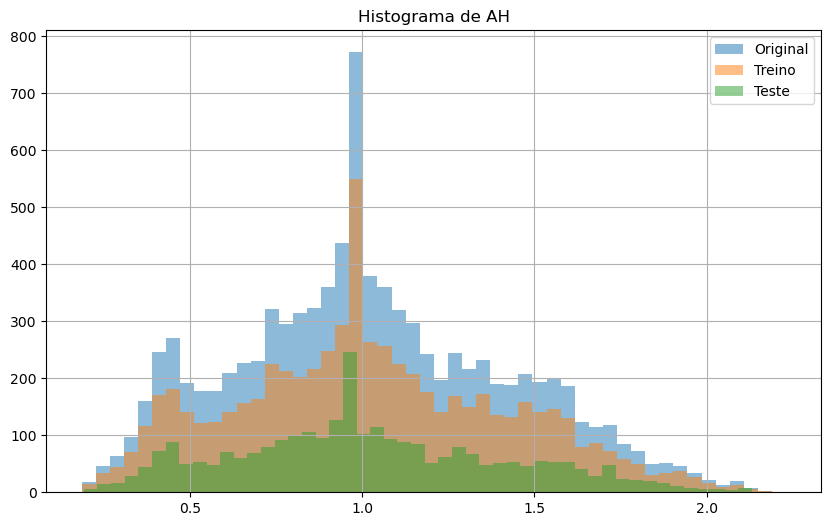

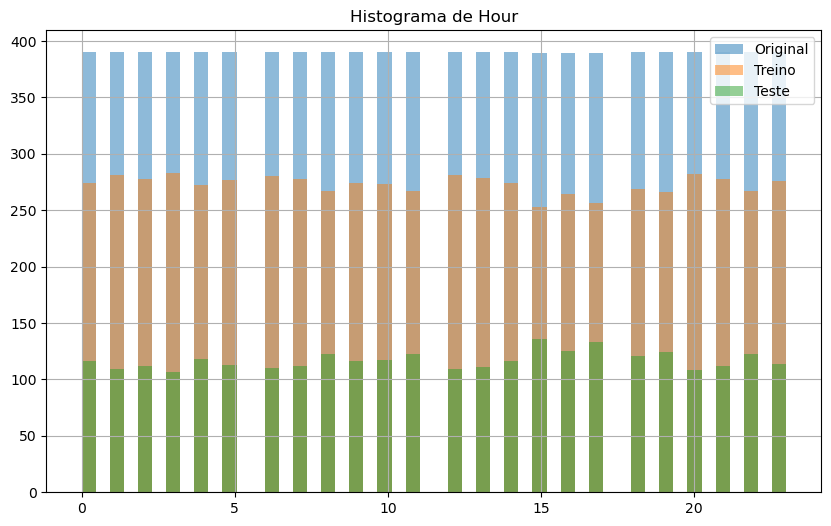

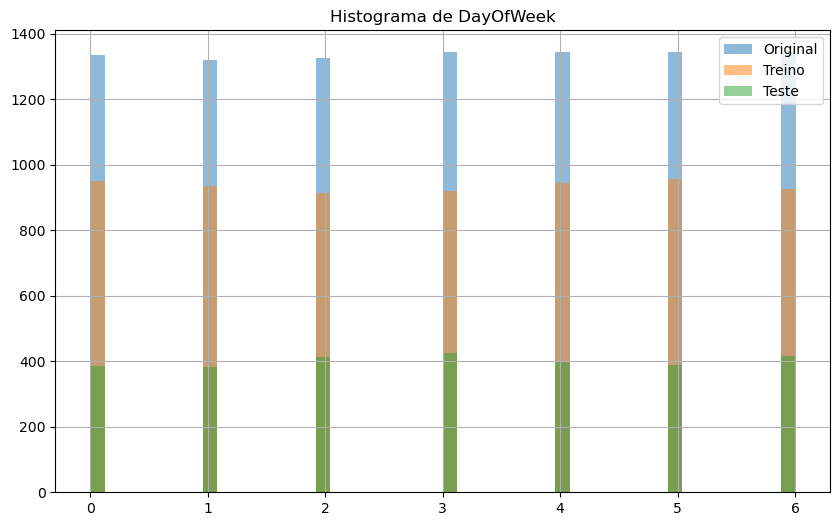

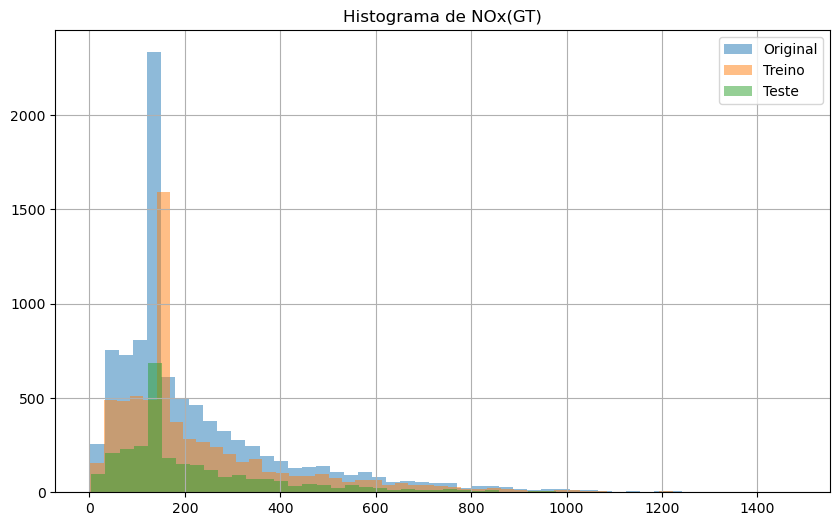

In [18]:
# Função para plotar histogramas comparativos
def plot_histograms(dataframes, column, labels):
    plt.figure(figsize=(10, 6))
    for df, label in zip(dataframes, labels):
        df[column].hist(bins=50, alpha=0.5, label=label)
    plt.title(f'Histograma de {column}')
    plt.legend()
    plt.show()

# Plotar histogramas para cada variável
for col in final_data.columns:
    plot_histograms([data, train_data, test_data], col, ['Original', 'Treino', 'Teste'])


In [19]:
print(train_data.describe())

       PT08.S1(CO)  PT08.S2(NMHC)  PT08.S4(NO2)            T           RH  \
count  6549.000000    6549.000000   6549.000000  6549.000000  6549.000000   
mean   1096.077569     934.134219   1453.051306    18.220614    49.448649   
std     211.313416     259.500863    336.661733     8.633085    16.972289   
min     647.000000     383.000000    551.000000    -1.400000     9.200000   
25%     942.000000     740.000000   1238.000000    12.100000    36.900000   
50%    1053.000000     895.000000   1446.000000    17.200000    48.900000   
75%    1217.000000    1101.000000   1659.000000    23.900000    62.000000   
max    2008.000000    2214.000000   2691.000000    44.600000    87.200000   

                AH         Hour    DayOfWeek      NOx(GT)  
count  6549.000000  6549.000000  6549.000000  6549.000000  
mean      1.025900    11.430142     3.000153   227.929760  
std       0.396458     6.944862     2.005071   196.970113  
min       0.184700     0.000000     0.000000     2.000000  
25%   

In [20]:
# Separar características e alvo
X_train = train_data[features].values
y_train = train_data[target].values
X_test = test_data[features].values
y_test = test_data[target].values

In [21]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Construir o modelo
model = Sequential()
model.add(Dense(64, input_dim=len(features), activation='relu'))  # Camada de entrada
model.add(Dense(32, activation='relu'))  # Camada oculta
model.add(Dense(1))  # Camada de saída

In [25]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [26]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2689 (10.50 KB)
Trainable params: 2689 (10.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# Treinar o modelo e salvar o histórico
history = model.fit(X_train, y_train, epochs=10000, batch_size=32, validation_split=0.2)

# Imprimir a evolução do treinamento
for epoch in range(len(history.history['loss'])):
    print(f"Época {epoch + 1}/{len(history.history['loss'])} - "
          f"Perda: {history.history['loss'][epoch]:.4f}, "
          f"Erro Absoluto Médio: {history.history['mean_absolute_error'][epoch]:.4f}, "
          f"Perda de Validação: {history.history['val_loss'][epoch]:.4f}, "
          f"Erro Absoluto Médio de Validação: {history.history['val_mean_absolute_error'][epoch]:.4f}")

Epoch 1/10000
164/164 [==============================] - 0s 2ms/step - loss: 11959.2852 - mean_absolute_error: 67.8111 - val_loss: 11089.1895 - val_mean_absolute_error: 66.9099
Epoch 2/10000
164/164 [==============================] - 0s 1ms/step - loss: 12053.9600 - mean_absolute_error: 68.0937 - val_loss: 11229.1133 - val_mean_absolute_error: 68.2482
Epoch 3/10000
164/164 [==============================] - 0s 1ms/step - loss: 11999.5020 - mean_absolute_error: 67.9292 - val_loss: 11118.3711 - val_mean_absolute_error: 63.5352
Epoch 4/10000
164/164 [==============================] - 0s 1ms/step - loss: 12033.1680 - mean_absolute_error: 67.6005 - val_loss: 10943.5020 - val_mean_absolute_error: 65.3992
Epoch 5/10000
164/164 [==============================] - 0s 1ms/step - loss: 11935.4873 - mean_absolute_error: 67.7251 - val_loss: 11209.0615 - val_mean_absolute_error: 65.8090
Epoch 6/10000
164/164 [==============================] - 0s 1ms/step - loss: 11748.3896 - mean_absolute_error: 66.9

164/164 [==============================] - 0s 1ms/step - loss: 11357.7861 - mean_absolute_error: 65.1214 - val_loss: 11981.5508 - val_mean_absolute_error: 68.8908
Epoch 48/10000
164/164 [==============================] - 0s 1ms/step - loss: 11350.6152 - mean_absolute_error: 64.9630 - val_loss: 10319.7676 - val_mean_absolute_error: 62.8510
Epoch 49/10000
164/164 [==============================] - 0s 1ms/step - loss: 11576.2891 - mean_absolute_error: 66.6560 - val_loss: 11588.4961 - val_mean_absolute_error: 64.5275
Epoch 50/10000
164/164 [==============================] - 0s 1ms/step - loss: 11253.8438 - mean_absolute_error: 65.0601 - val_loss: 10528.3936 - val_mean_absolute_error: 64.2443
Epoch 51/10000
164/164 [==============================] - 0s 1ms/step - loss: 11333.9521 - mean_absolute_error: 65.2522 - val_loss: 10601.3379 - val_mean_absolute_error: 61.9151
Epoch 52/10000
164/164 [==============================] - 0s 1ms/step - loss: 11346.1895 - mean_absolute_error: 65.3002 - val

Epoch 139/10000
164/164 [==============================] - 0s 1ms/step - loss: 10537.1777 - mean_absolute_error: 62.8196 - val_loss: 10008.7500 - val_mean_absolute_error: 63.2317
Epoch 140/10000
164/164 [==============================] - 0s 1ms/step - loss: 10432.0820 - mean_absolute_error: 62.3433 - val_loss: 9927.0674 - val_mean_absolute_error: 61.1759
Epoch 141/10000
164/164 [==============================] - 0s 1ms/step - loss: 10443.4756 - mean_absolute_error: 62.3914 - val_loss: 9866.5049 - val_mean_absolute_error: 61.7009
Epoch 142/10000
164/164 [==============================] - 0s 1ms/step - loss: 10498.0664 - mean_absolute_error: 62.2201 - val_loss: 10047.1348 - val_mean_absolute_error: 64.6562
Epoch 143/10000
164/164 [==============================] - 0s 1ms/step - loss: 10606.0273 - mean_absolute_error: 63.0009 - val_loss: 10213.6855 - val_mean_absolute_error: 62.9189
Epoch 144/10000
164/164 [==============================] - 0s 1ms/step - loss: 10542.7266 - mean_absolute_e

Epoch 185/10000
164/164 [==============================] - 0s 1ms/step - loss: 10369.8057 - mean_absolute_error: 62.3264 - val_loss: 9639.5215 - val_mean_absolute_error: 61.0259
Epoch 186/10000
164/164 [==============================] - 0s 1ms/step - loss: 10316.1143 - mean_absolute_error: 61.9670 - val_loss: 9782.6973 - val_mean_absolute_error: 59.4703
Epoch 187/10000
164/164 [==============================] - 0s 1ms/step - loss: 10311.3408 - mean_absolute_error: 61.7564 - val_loss: 9487.4600 - val_mean_absolute_error: 59.6420
Epoch 188/10000
164/164 [==============================] - 0s 1ms/step - loss: 10347.2480 - mean_absolute_error: 61.9556 - val_loss: 9722.2979 - val_mean_absolute_error: 60.3890
Epoch 189/10000
164/164 [==============================] - 0s 1ms/step - loss: 10081.7588 - mean_absolute_error: 61.0678 - val_loss: 9657.8701 - val_mean_absolute_error: 61.1886
Epoch 190/10000
164/164 [==============================] - 0s 1ms/step - loss: 10214.2422 - mean_absolute_erro

164/164 [==============================] - 0s 1ms/step - loss: 10070.7266 - mean_absolute_error: 61.5878 - val_loss: 9305.4375 - val_mean_absolute_error: 59.5601
Epoch 232/10000
164/164 [==============================] - 0s 1ms/step - loss: 10149.5605 - mean_absolute_error: 61.4145 - val_loss: 10445.3447 - val_mean_absolute_error: 61.8637
Epoch 233/10000
164/164 [==============================] - 0s 1ms/step - loss: 10121.2373 - mean_absolute_error: 61.3933 - val_loss: 9491.4287 - val_mean_absolute_error: 61.7314
Epoch 234/10000
164/164 [==============================] - 0s 1ms/step - loss: 10125.8203 - mean_absolute_error: 61.5799 - val_loss: 9492.5469 - val_mean_absolute_error: 61.6505
Epoch 235/10000
164/164 [==============================] - 0s 1ms/step - loss: 9981.1641 - mean_absolute_error: 60.8063 - val_loss: 9241.8623 - val_mean_absolute_error: 58.9321
Epoch 236/10000
164/164 [==============================] - 0s 1ms/step - loss: 10114.2227 - mean_absolute_error: 61.4020 - val

164/164 [==============================] - 0s 1ms/step - loss: 9743.0674 - mean_absolute_error: 60.6574 - val_loss: 9419.2178 - val_mean_absolute_error: 60.9629
Epoch 324/10000
164/164 [==============================] - 0s 1ms/step - loss: 9491.0244 - mean_absolute_error: 60.1605 - val_loss: 9270.9482 - val_mean_absolute_error: 62.0840
Epoch 325/10000
164/164 [==============================] - 0s 1ms/step - loss: 9524.7178 - mean_absolute_error: 59.6440 - val_loss: 9296.9756 - val_mean_absolute_error: 59.2933
Epoch 326/10000
164/164 [==============================] - 0s 1ms/step - loss: 9544.2373 - mean_absolute_error: 59.5244 - val_loss: 9342.6611 - val_mean_absolute_error: 60.8514
Epoch 327/10000
164/164 [==============================] - 0s 1ms/step - loss: 9652.5078 - mean_absolute_error: 59.9868 - val_loss: 9401.2900 - val_mean_absolute_error: 58.6823
Epoch 328/10000
164/164 [==============================] - 0s 1ms/step - loss: 9624.2285 - mean_absolute_error: 60.4227 - val_loss:

164/164 [==============================] - 0s 1ms/step - loss: 9425.9072 - mean_absolute_error: 59.6388 - val_loss: 9293.9160 - val_mean_absolute_error: 58.8361
Epoch 416/10000
164/164 [==============================] - 0s 1ms/step - loss: 9463.9531 - mean_absolute_error: 59.3480 - val_loss: 8775.2920 - val_mean_absolute_error: 57.3260
Epoch 417/10000
164/164 [==============================] - 0s 1ms/step - loss: 9464.7783 - mean_absolute_error: 59.5324 - val_loss: 9044.5957 - val_mean_absolute_error: 59.8662
Epoch 418/10000
164/164 [==============================] - 0s 1ms/step - loss: 9402.9668 - mean_absolute_error: 59.5237 - val_loss: 9258.3555 - val_mean_absolute_error: 59.1513
Epoch 419/10000
164/164 [==============================] - 0s 1ms/step - loss: 9382.0166 - mean_absolute_error: 59.6467 - val_loss: 8909.6172 - val_mean_absolute_error: 58.0256
Epoch 420/10000
164/164 [==============================] - 0s 1ms/step - loss: 9268.8242 - mean_absolute_error: 58.7040 - val_loss:

164/164 [==============================] - 0s 1ms/step - loss: 9030.7520 - mean_absolute_error: 58.3005 - val_loss: 8845.0527 - val_mean_absolute_error: 57.2472
Epoch 508/10000
164/164 [==============================] - 0s 1ms/step - loss: 9179.0986 - mean_absolute_error: 58.6294 - val_loss: 9316.5332 - val_mean_absolute_error: 58.8077
Epoch 509/10000
164/164 [==============================] - 0s 1ms/step - loss: 9175.7334 - mean_absolute_error: 58.6560 - val_loss: 8923.3369 - val_mean_absolute_error: 57.5896
Epoch 510/10000
164/164 [==============================] - 0s 1ms/step - loss: 9085.1279 - mean_absolute_error: 58.0544 - val_loss: 8963.7217 - val_mean_absolute_error: 57.9586
Epoch 511/10000
164/164 [==============================] - 0s 1ms/step - loss: 9174.4580 - mean_absolute_error: 59.0535 - val_loss: 9041.2861 - val_mean_absolute_error: 58.1417
Epoch 512/10000
164/164 [==============================] - 0s 1ms/step - loss: 9105.4258 - mean_absolute_error: 58.0862 - val_loss:

164/164 [==============================] - 0s 1ms/step - loss: 8757.7354 - mean_absolute_error: 56.9462 - val_loss: 8804.9043 - val_mean_absolute_error: 57.8655
Epoch 600/10000
164/164 [==============================] - 0s 1ms/step - loss: 9014.8574 - mean_absolute_error: 58.3730 - val_loss: 8889.0117 - val_mean_absolute_error: 58.0853
Epoch 601/10000
164/164 [==============================] - 0s 1ms/step - loss: 8765.8945 - mean_absolute_error: 57.2505 - val_loss: 9261.6035 - val_mean_absolute_error: 57.9770
Epoch 602/10000
164/164 [==============================] - 0s 1ms/step - loss: 8862.4629 - mean_absolute_error: 57.5210 - val_loss: 9030.8115 - val_mean_absolute_error: 58.2985
Epoch 603/10000
164/164 [==============================] - 0s 1ms/step - loss: 8836.7178 - mean_absolute_error: 57.6896 - val_loss: 8782.7900 - val_mean_absolute_error: 58.7715
Epoch 604/10000
164/164 [==============================] - 0s 1ms/step - loss: 8787.8760 - mean_absolute_error: 57.5436 - val_loss:

164/164 [==============================] - 0s 1ms/step - loss: 8752.5898 - mean_absolute_error: 57.1757 - val_loss: 9603.0527 - val_mean_absolute_error: 63.3086
Epoch 692/10000
164/164 [==============================] - 0s 1ms/step - loss: 8577.3535 - mean_absolute_error: 56.9899 - val_loss: 8535.0303 - val_mean_absolute_error: 57.8138
Epoch 693/10000
164/164 [==============================] - 0s 1ms/step - loss: 8603.6357 - mean_absolute_error: 56.7670 - val_loss: 8523.1074 - val_mean_absolute_error: 55.2008
Epoch 694/10000
164/164 [==============================] - 0s 1ms/step - loss: 8556.5645 - mean_absolute_error: 56.2707 - val_loss: 8777.7246 - val_mean_absolute_error: 57.9295
Epoch 695/10000
164/164 [==============================] - 0s 1ms/step - loss: 8683.2988 - mean_absolute_error: 57.2790 - val_loss: 8594.2568 - val_mean_absolute_error: 56.7796
Epoch 696/10000
164/164 [==============================] - 0s 1ms/step - loss: 8562.6689 - mean_absolute_error: 56.5127 - val_loss:

164/164 [==============================] - 0s 1ms/step - loss: 8471.8477 - mean_absolute_error: 56.2556 - val_loss: 8122.7861 - val_mean_absolute_error: 54.4263
Epoch 784/10000
164/164 [==============================] - 0s 1ms/step - loss: 8436.3691 - mean_absolute_error: 56.1405 - val_loss: 8375.5898 - val_mean_absolute_error: 57.1056
Epoch 785/10000
164/164 [==============================] - 0s 1ms/step - loss: 8461.2861 - mean_absolute_error: 56.5444 - val_loss: 8769.7744 - val_mean_absolute_error: 57.9978
Epoch 786/10000
164/164 [==============================] - 0s 1ms/step - loss: 8401.8877 - mean_absolute_error: 55.9815 - val_loss: 8356.4316 - val_mean_absolute_error: 57.3178
Epoch 787/10000
164/164 [==============================] - 0s 1ms/step - loss: 8581.4473 - mean_absolute_error: 56.9814 - val_loss: 8548.0918 - val_mean_absolute_error: 55.4209
Epoch 788/10000
164/164 [==============================] - 0s 1ms/step - loss: 8418.0488 - mean_absolute_error: 56.0791 - val_loss:

164/164 [==============================] - 0s 1ms/step - loss: 8565.9160 - mean_absolute_error: 56.1654 - val_loss: 8177.1616 - val_mean_absolute_error: 54.2180
Epoch 876/10000
164/164 [==============================] - 0s 1ms/step - loss: 8444.3916 - mean_absolute_error: 55.6183 - val_loss: 8607.3584 - val_mean_absolute_error: 53.8914
Epoch 877/10000
164/164 [==============================] - 0s 2ms/step - loss: 8590.4414 - mean_absolute_error: 56.3995 - val_loss: 7980.1392 - val_mean_absolute_error: 54.1021
Epoch 878/10000
164/164 [==============================] - 0s 1ms/step - loss: 8432.4844 - mean_absolute_error: 56.1325 - val_loss: 8406.9463 - val_mean_absolute_error: 58.1170
Epoch 879/10000
164/164 [==============================] - 0s 1ms/step - loss: 8356.4570 - mean_absolute_error: 55.8868 - val_loss: 8630.9668 - val_mean_absolute_error: 55.1017
Epoch 880/10000
164/164 [==============================] - 0s 1ms/step - loss: 8388.3496 - mean_absolute_error: 56.0326 - val_loss:

164/164 [==============================] - 0s 1ms/step - loss: 8436.7490 - mean_absolute_error: 56.1801 - val_loss: 8273.9121 - val_mean_absolute_error: 56.1236
Epoch 968/10000
164/164 [==============================] - 0s 1ms/step - loss: 8279.2119 - mean_absolute_error: 55.0649 - val_loss: 9030.8467 - val_mean_absolute_error: 63.1445
Epoch 969/10000
164/164 [==============================] - 0s 1ms/step - loss: 8289.7832 - mean_absolute_error: 55.4015 - val_loss: 8189.1914 - val_mean_absolute_error: 54.8774
Epoch 970/10000
164/164 [==============================] - 0s 1ms/step - loss: 8192.2500 - mean_absolute_error: 54.8751 - val_loss: 8183.7861 - val_mean_absolute_error: 54.6621
Epoch 971/10000
164/164 [==============================] - 0s 1ms/step - loss: 8337.0205 - mean_absolute_error: 55.6785 - val_loss: 8603.0820 - val_mean_absolute_error: 57.3314
Epoch 972/10000
164/164 [==============================] - 0s 2ms/step - loss: 8285.6162 - mean_absolute_error: 55.4758 - val_loss:

164/164 [==============================] - 0s 1ms/step - loss: 8070.9775 - mean_absolute_error: 54.2045 - val_loss: 8115.8608 - val_mean_absolute_error: 53.4509
Epoch 1060/10000
164/164 [==============================] - 0s 1ms/step - loss: 8137.8418 - mean_absolute_error: 53.9044 - val_loss: 8510.7881 - val_mean_absolute_error: 55.8304
Epoch 1061/10000
164/164 [==============================] - 0s 1ms/step - loss: 8033.9209 - mean_absolute_error: 54.7836 - val_loss: 8318.2725 - val_mean_absolute_error: 55.4300
Epoch 1062/10000
164/164 [==============================] - 0s 1ms/step - loss: 8261.4492 - mean_absolute_error: 55.2454 - val_loss: 8531.9648 - val_mean_absolute_error: 54.4999
Epoch 1063/10000
164/164 [==============================] - 0s 1ms/step - loss: 8160.1987 - mean_absolute_error: 54.6091 - val_loss: 8587.9395 - val_mean_absolute_error: 54.9993
Epoch 1064/10000
164/164 [==============================] - 0s 1ms/step - loss: 8203.9561 - mean_absolute_error: 54.9130 - val_

164/164 [==============================] - 0s 1ms/step - loss: 8080.0063 - mean_absolute_error: 54.3512 - val_loss: 8311.1240 - val_mean_absolute_error: 55.4476
Epoch 1152/10000
164/164 [==============================] - 0s 1ms/step - loss: 8116.3979 - mean_absolute_error: 54.5332 - val_loss: 8027.5044 - val_mean_absolute_error: 54.8436
Epoch 1153/10000
164/164 [==============================] - 0s 1ms/step - loss: 8245.7061 - mean_absolute_error: 55.1749 - val_loss: 7881.2466 - val_mean_absolute_error: 54.1799
Epoch 1154/10000
164/164 [==============================] - 0s 1ms/step - loss: 7901.0771 - mean_absolute_error: 53.4549 - val_loss: 9324.6553 - val_mean_absolute_error: 60.5314
Epoch 1155/10000
164/164 [==============================] - 0s 1ms/step - loss: 8167.2427 - mean_absolute_error: 54.8540 - val_loss: 7808.2788 - val_mean_absolute_error: 53.5713
Epoch 1156/10000
164/164 [==============================] - 0s 1ms/step - loss: 8017.8735 - mean_absolute_error: 53.7983 - val_

164/164 [==============================] - 0s 1ms/step - loss: 8082.1958 - mean_absolute_error: 54.3244 - val_loss: 7935.5083 - val_mean_absolute_error: 52.4498
Epoch 1244/10000
164/164 [==============================] - 0s 1ms/step - loss: 8065.7593 - mean_absolute_error: 54.2359 - val_loss: 8113.9346 - val_mean_absolute_error: 56.4852
Epoch 1245/10000
164/164 [==============================] - 0s 1ms/step - loss: 8047.6250 - mean_absolute_error: 54.0376 - val_loss: 7986.8560 - val_mean_absolute_error: 56.2521
Epoch 1246/10000
164/164 [==============================] - 0s 1ms/step - loss: 8104.5977 - mean_absolute_error: 54.3158 - val_loss: 7933.2158 - val_mean_absolute_error: 52.7251
Epoch 1247/10000
164/164 [==============================] - 0s 1ms/step - loss: 7919.3970 - mean_absolute_error: 53.8222 - val_loss: 7942.4619 - val_mean_absolute_error: 53.1023
Epoch 1248/10000
164/164 [==============================] - 0s 1ms/step - loss: 8107.2021 - mean_absolute_error: 54.5514 - val_

164/164 [==============================] - 0s 1ms/step - loss: 8117.3398 - mean_absolute_error: 54.0420 - val_loss: 8573.1426 - val_mean_absolute_error: 58.7428
Epoch 1336/10000
164/164 [==============================] - 0s 1ms/step - loss: 8122.4707 - mean_absolute_error: 54.7298 - val_loss: 9122.1182 - val_mean_absolute_error: 57.6958
Epoch 1337/10000
164/164 [==============================] - 0s 1ms/step - loss: 8060.1567 - mean_absolute_error: 53.9614 - val_loss: 7850.5825 - val_mean_absolute_error: 52.9724
Epoch 1338/10000
164/164 [==============================] - 0s 1ms/step - loss: 7999.7822 - mean_absolute_error: 53.9166 - val_loss: 7869.8999 - val_mean_absolute_error: 53.5823
Epoch 1339/10000
164/164 [==============================] - 0s 1ms/step - loss: 7866.5532 - mean_absolute_error: 53.3052 - val_loss: 7861.8281 - val_mean_absolute_error: 53.2878
Epoch 1340/10000
164/164 [==============================] - 0s 1ms/step - loss: 8077.6772 - mean_absolute_error: 53.8920 - val_

164/164 [==============================] - 0s 1ms/step - loss: 7886.2607 - mean_absolute_error: 53.5349 - val_loss: 7898.6655 - val_mean_absolute_error: 54.6690
Epoch 1428/10000
164/164 [==============================] - 0s 1ms/step - loss: 7800.1548 - mean_absolute_error: 52.6622 - val_loss: 8025.5479 - val_mean_absolute_error: 55.0070
Epoch 1429/10000
164/164 [==============================] - 0s 1ms/step - loss: 8017.4233 - mean_absolute_error: 53.5459 - val_loss: 7980.3174 - val_mean_absolute_error: 52.9961
Epoch 1430/10000
164/164 [==============================] - 0s 1ms/step - loss: 8220.8584 - mean_absolute_error: 54.2963 - val_loss: 8040.1724 - val_mean_absolute_error: 53.4077
Epoch 1431/10000
164/164 [==============================] - 0s 1ms/step - loss: 7815.1694 - mean_absolute_error: 53.7607 - val_loss: 8215.9629 - val_mean_absolute_error: 51.6168
Epoch 1432/10000
164/164 [==============================] - 0s 1ms/step - loss: 7745.7354 - mean_absolute_error: 53.4529 - val_

164/164 [==============================] - 0s 1ms/step - loss: 7895.1304 - mean_absolute_error: 53.4864 - val_loss: 7688.3037 - val_mean_absolute_error: 52.3982
Epoch 1520/10000
164/164 [==============================] - 0s 1ms/step - loss: 7568.0977 - mean_absolute_error: 52.0615 - val_loss: 7897.9487 - val_mean_absolute_error: 54.1896
Epoch 1521/10000
164/164 [==============================] - 0s 1ms/step - loss: 7863.3770 - mean_absolute_error: 53.1716 - val_loss: 7854.9795 - val_mean_absolute_error: 53.1353
Epoch 1522/10000
164/164 [==============================] - 0s 1ms/step - loss: 7889.8872 - mean_absolute_error: 53.6341 - val_loss: 9218.6475 - val_mean_absolute_error: 57.9965
Epoch 1523/10000
164/164 [==============================] - 0s 1ms/step - loss: 7965.2852 - mean_absolute_error: 52.9301 - val_loss: 8725.2158 - val_mean_absolute_error: 56.1947
Epoch 1524/10000
164/164 [==============================] - 0s 1ms/step - loss: 7782.2319 - mean_absolute_error: 53.1233 - val_

164/164 [==============================] - 0s 1ms/step - loss: 7596.3687 - mean_absolute_error: 52.2514 - val_loss: 7806.7100 - val_mean_absolute_error: 53.4390
Epoch 1612/10000
164/164 [==============================] - 0s 1ms/step - loss: 7587.5054 - mean_absolute_error: 52.7291 - val_loss: 8177.8442 - val_mean_absolute_error: 53.5295
Epoch 1613/10000
164/164 [==============================] - 0s 1ms/step - loss: 7789.9937 - mean_absolute_error: 52.4727 - val_loss: 8127.0146 - val_mean_absolute_error: 52.4522
Epoch 1614/10000
164/164 [==============================] - 0s 1ms/step - loss: 7767.5166 - mean_absolute_error: 52.8867 - val_loss: 8062.3984 - val_mean_absolute_error: 52.8612
Epoch 1615/10000
164/164 [==============================] - 0s 1ms/step - loss: 7774.7041 - mean_absolute_error: 52.6175 - val_loss: 8011.3511 - val_mean_absolute_error: 54.6693
Epoch 1616/10000
164/164 [==============================] - 0s 1ms/step - loss: 8139.1426 - mean_absolute_error: 53.1151 - val_

164/164 [==============================] - 0s 1ms/step - loss: 7568.8076 - mean_absolute_error: 52.0120 - val_loss: 8621.1406 - val_mean_absolute_error: 56.6805
Epoch 1704/10000
164/164 [==============================] - 0s 1ms/step - loss: 7846.7725 - mean_absolute_error: 52.6177 - val_loss: 8673.6904 - val_mean_absolute_error: 54.5972
Epoch 1705/10000
164/164 [==============================] - 0s 1ms/step - loss: 7826.5732 - mean_absolute_error: 52.9482 - val_loss: 7990.0649 - val_mean_absolute_error: 52.5506
Epoch 1706/10000
164/164 [==============================] - 0s 1ms/step - loss: 7674.5288 - mean_absolute_error: 52.7644 - val_loss: 8255.2783 - val_mean_absolute_error: 52.5592
Epoch 1707/10000
164/164 [==============================] - 0s 1ms/step - loss: 7735.7646 - mean_absolute_error: 53.1703 - val_loss: 7765.5312 - val_mean_absolute_error: 53.9076
Epoch 1708/10000
164/164 [==============================] - 0s 1ms/step - loss: 7516.7261 - mean_absolute_error: 52.0807 - val_

164/164 [==============================] - 0s 1ms/step - loss: 7607.0464 - mean_absolute_error: 52.2424 - val_loss: 7644.3838 - val_mean_absolute_error: 51.8677
Epoch 1796/10000
164/164 [==============================] - 0s 1ms/step - loss: 7601.6123 - mean_absolute_error: 51.8493 - val_loss: 7887.0718 - val_mean_absolute_error: 53.9201
Epoch 1797/10000
164/164 [==============================] - 0s 1ms/step - loss: 7746.9463 - mean_absolute_error: 52.3688 - val_loss: 7677.1597 - val_mean_absolute_error: 52.6956
Epoch 1798/10000
164/164 [==============================] - 0s 1ms/step - loss: 7437.5444 - mean_absolute_error: 51.4746 - val_loss: 8344.5195 - val_mean_absolute_error: 55.6486
Epoch 1799/10000
164/164 [==============================] - 0s 1ms/step - loss: 7380.0552 - mean_absolute_error: 51.6307 - val_loss: 7952.8525 - val_mean_absolute_error: 54.1958
Epoch 1800/10000
164/164 [==============================] - 0s 1ms/step - loss: 7613.4429 - mean_absolute_error: 51.8247 - val_

164/164 [==============================] - 0s 1ms/step - loss: 7716.3750 - mean_absolute_error: 52.3622 - val_loss: 7962.0229 - val_mean_absolute_error: 53.4415
Epoch 1888/10000
164/164 [==============================] - 0s 1ms/step - loss: 7615.5693 - mean_absolute_error: 52.3079 - val_loss: 7623.1357 - val_mean_absolute_error: 53.2000
Epoch 1889/10000
164/164 [==============================] - 0s 1ms/step - loss: 7532.3071 - mean_absolute_error: 52.1081 - val_loss: 7823.2915 - val_mean_absolute_error: 53.6950
Epoch 1890/10000
164/164 [==============================] - 0s 1ms/step - loss: 7366.0254 - mean_absolute_error: 51.3645 - val_loss: 8518.0039 - val_mean_absolute_error: 57.1293
Epoch 1891/10000
164/164 [==============================] - 0s 1ms/step - loss: 7549.4780 - mean_absolute_error: 51.9218 - val_loss: 7703.8384 - val_mean_absolute_error: 51.2584
Epoch 1892/10000
164/164 [==============================] - 0s 1ms/step - loss: 7701.9727 - mean_absolute_error: 52.3705 - val_

164/164 [==============================] - 0s 1ms/step - loss: 7651.2524 - mean_absolute_error: 52.2555 - val_loss: 8094.4443 - val_mean_absolute_error: 52.9881
Epoch 1980/10000
164/164 [==============================] - 0s 1ms/step - loss: 7416.6328 - mean_absolute_error: 50.9533 - val_loss: 7902.7700 - val_mean_absolute_error: 51.1437
Epoch 1981/10000
164/164 [==============================] - 0s 1ms/step - loss: 7343.6763 - mean_absolute_error: 51.1320 - val_loss: 7576.8633 - val_mean_absolute_error: 51.6205
Epoch 1982/10000
164/164 [==============================] - 0s 1ms/step - loss: 7281.4043 - mean_absolute_error: 51.4707 - val_loss: 8139.1040 - val_mean_absolute_error: 51.7981
Epoch 1983/10000
164/164 [==============================] - 0s 1ms/step - loss: 7600.8618 - mean_absolute_error: 51.7895 - val_loss: 8023.8564 - val_mean_absolute_error: 53.9803
Epoch 1984/10000
164/164 [==============================] - 0s 1ms/step - loss: 7811.7549 - mean_absolute_error: 52.6925 - val_

164/164 [==============================] - 0s 1ms/step - loss: 7395.6299 - mean_absolute_error: 50.9026 - val_loss: 7705.2520 - val_mean_absolute_error: 51.3523
Epoch 2072/10000
164/164 [==============================] - 0s 1ms/step - loss: 7311.2656 - mean_absolute_error: 51.4270 - val_loss: 8255.4248 - val_mean_absolute_error: 51.5930
Epoch 2073/10000
164/164 [==============================] - 0s 1ms/step - loss: 7653.6553 - mean_absolute_error: 52.0779 - val_loss: 7736.5029 - val_mean_absolute_error: 53.1253
Epoch 2074/10000
164/164 [==============================] - 0s 1ms/step - loss: 7446.5732 - mean_absolute_error: 52.6253 - val_loss: 8428.4385 - val_mean_absolute_error: 54.4435
Epoch 2075/10000
164/164 [==============================] - 0s 1ms/step - loss: 7974.7778 - mean_absolute_error: 52.9600 - val_loss: 8042.4917 - val_mean_absolute_error: 57.0667
Epoch 2076/10000
164/164 [==============================] - 0s 1ms/step - loss: 7268.5000 - mean_absolute_error: 51.8551 - val_

164/164 [==============================] - 0s 1ms/step - loss: 7464.4067 - mean_absolute_error: 51.1000 - val_loss: 8964.3535 - val_mean_absolute_error: 57.7120
Epoch 2164/10000
164/164 [==============================] - 0s 1ms/step - loss: 7527.4951 - mean_absolute_error: 51.9490 - val_loss: 8143.3560 - val_mean_absolute_error: 55.5345
Epoch 2165/10000
164/164 [==============================] - 0s 1ms/step - loss: 7409.1973 - mean_absolute_error: 51.3218 - val_loss: 7979.9048 - val_mean_absolute_error: 54.0073
Epoch 2166/10000
164/164 [==============================] - 0s 1ms/step - loss: 7208.2734 - mean_absolute_error: 50.5896 - val_loss: 7571.1021 - val_mean_absolute_error: 50.9527
Epoch 2167/10000
164/164 [==============================] - 0s 1ms/step - loss: 7531.9780 - mean_absolute_error: 52.0390 - val_loss: 7919.6182 - val_mean_absolute_error: 52.9963
Epoch 2168/10000
164/164 [==============================] - 0s 1ms/step - loss: 7281.9468 - mean_absolute_error: 51.2401 - val_

164/164 [==============================] - 0s 1ms/step - loss: 7124.4512 - mean_absolute_error: 50.4754 - val_loss: 7653.6450 - val_mean_absolute_error: 51.7651
Epoch 2256/10000
164/164 [==============================] - 0s 1ms/step - loss: 7304.5107 - mean_absolute_error: 51.3280 - val_loss: 7938.8560 - val_mean_absolute_error: 53.0000
Epoch 2257/10000
164/164 [==============================] - 0s 1ms/step - loss: 7517.0566 - mean_absolute_error: 51.7404 - val_loss: 8364.6982 - val_mean_absolute_error: 56.3613
Epoch 2258/10000
164/164 [==============================] - 0s 1ms/step - loss: 7342.3340 - mean_absolute_error: 51.2210 - val_loss: 7759.2070 - val_mean_absolute_error: 53.0435
Epoch 2259/10000
164/164 [==============================] - 0s 1ms/step - loss: 7293.0200 - mean_absolute_error: 51.0386 - val_loss: 7818.5825 - val_mean_absolute_error: 52.1888
Epoch 2260/10000
164/164 [==============================] - 0s 1ms/step - loss: 7211.6045 - mean_absolute_error: 50.8208 - val_

164/164 [==============================] - 0s 1ms/step - loss: 7124.8955 - mean_absolute_error: 50.6518 - val_loss: 7861.6235 - val_mean_absolute_error: 52.6084
Epoch 2348/10000
164/164 [==============================] - 0s 1ms/step - loss: 7389.6104 - mean_absolute_error: 51.5260 - val_loss: 7696.3604 - val_mean_absolute_error: 52.4921
Epoch 2349/10000
164/164 [==============================] - 0s 1ms/step - loss: 7335.3809 - mean_absolute_error: 51.2473 - val_loss: 7360.0732 - val_mean_absolute_error: 51.3710
Epoch 2350/10000
164/164 [==============================] - 0s 1ms/step - loss: 7167.7266 - mean_absolute_error: 50.6489 - val_loss: 8407.5957 - val_mean_absolute_error: 55.0183
Epoch 2351/10000
164/164 [==============================] - 0s 1ms/step - loss: 7288.5957 - mean_absolute_error: 50.7731 - val_loss: 7802.3184 - val_mean_absolute_error: 53.9303
Epoch 2352/10000
164/164 [==============================] - 0s 1ms/step - loss: 7069.8608 - mean_absolute_error: 50.2337 - val_

164/164 [==============================] - 0s 1ms/step - loss: 7010.5518 - mean_absolute_error: 50.3618 - val_loss: 7720.9766 - val_mean_absolute_error: 51.8714
Epoch 2440/10000
164/164 [==============================] - 0s 1ms/step - loss: 7359.0884 - mean_absolute_error: 51.0720 - val_loss: 8657.2285 - val_mean_absolute_error: 52.8821
Epoch 2441/10000
164/164 [==============================] - 0s 1ms/step - loss: 7030.8252 - mean_absolute_error: 49.9486 - val_loss: 7609.5674 - val_mean_absolute_error: 51.8007
Epoch 2442/10000
164/164 [==============================] - 0s 1ms/step - loss: 7036.2793 - mean_absolute_error: 50.6268 - val_loss: 7876.5146 - val_mean_absolute_error: 51.3143
Epoch 2443/10000
164/164 [==============================] - 0s 1ms/step - loss: 7360.4141 - mean_absolute_error: 51.0731 - val_loss: 7844.4746 - val_mean_absolute_error: 52.3618
Epoch 2444/10000
164/164 [==============================] - 0s 1ms/step - loss: 7186.8091 - mean_absolute_error: 50.3764 - val_

164/164 [==============================] - 0s 1ms/step - loss: 6836.8740 - mean_absolute_error: 49.6420 - val_loss: 7941.0063 - val_mean_absolute_error: 53.7114
Epoch 2532/10000
164/164 [==============================] - 0s 1ms/step - loss: 7144.3247 - mean_absolute_error: 50.4211 - val_loss: 8046.3198 - val_mean_absolute_error: 52.9650
Epoch 2533/10000
164/164 [==============================] - 0s 1ms/step - loss: 7079.5137 - mean_absolute_error: 50.6638 - val_loss: 7794.3398 - val_mean_absolute_error: 53.8406
Epoch 2534/10000
164/164 [==============================] - 0s 1ms/step - loss: 7159.1416 - mean_absolute_error: 51.0725 - val_loss: 8061.1963 - val_mean_absolute_error: 51.5621
Epoch 2535/10000
164/164 [==============================] - 0s 1ms/step - loss: 7038.5439 - mean_absolute_error: 50.3008 - val_loss: 7577.7168 - val_mean_absolute_error: 51.4118
Epoch 2536/10000
164/164 [==============================] - 0s 1ms/step - loss: 7075.0586 - mean_absolute_error: 50.5461 - val_

164/164 [==============================] - 0s 1ms/step - loss: 7079.4429 - mean_absolute_error: 50.2259 - val_loss: 8954.4629 - val_mean_absolute_error: 54.0082
Epoch 2624/10000
164/164 [==============================] - 0s 1ms/step - loss: 6957.4927 - mean_absolute_error: 50.2096 - val_loss: 7542.8838 - val_mean_absolute_error: 51.4679
Epoch 2625/10000
164/164 [==============================] - 0s 1ms/step - loss: 6742.6455 - mean_absolute_error: 49.1578 - val_loss: 7629.9741 - val_mean_absolute_error: 51.4886
Epoch 2626/10000
164/164 [==============================] - 0s 1ms/step - loss: 6985.5630 - mean_absolute_error: 49.5134 - val_loss: 7596.3833 - val_mean_absolute_error: 52.4004
Epoch 2627/10000
164/164 [==============================] - 0s 1ms/step - loss: 6867.8716 - mean_absolute_error: 49.1378 - val_loss: 7675.2803 - val_mean_absolute_error: 52.9806
Epoch 2628/10000
164/164 [==============================] - 0s 1ms/step - loss: 7108.9458 - mean_absolute_error: 50.2428 - val_

164/164 [==============================] - 0s 1ms/step - loss: 6691.9028 - mean_absolute_error: 48.8495 - val_loss: 7521.2808 - val_mean_absolute_error: 51.5486
Epoch 2716/10000
164/164 [==============================] - 0s 1ms/step - loss: 6834.9561 - mean_absolute_error: 49.5072 - val_loss: 7771.9863 - val_mean_absolute_error: 51.8044
Epoch 2717/10000
164/164 [==============================] - 0s 1ms/step - loss: 6979.2700 - mean_absolute_error: 50.2202 - val_loss: 7990.4443 - val_mean_absolute_error: 53.2072
Epoch 2718/10000
164/164 [==============================] - 0s 1ms/step - loss: 6763.2456 - mean_absolute_error: 49.6069 - val_loss: 7926.4907 - val_mean_absolute_error: 52.9557
Epoch 2719/10000
164/164 [==============================] - 0s 1ms/step - loss: 6902.9370 - mean_absolute_error: 49.9026 - val_loss: 8316.5479 - val_mean_absolute_error: 54.4476
Epoch 2720/10000
164/164 [==============================] - 0s 1ms/step - loss: 7193.1382 - mean_absolute_error: 51.0593 - val_

164/164 [==============================] - 0s 1ms/step - loss: 7093.4185 - mean_absolute_error: 50.5237 - val_loss: 7515.2085 - val_mean_absolute_error: 51.3937
Epoch 2808/10000
164/164 [==============================] - 0s 1ms/step - loss: 6710.6113 - mean_absolute_error: 48.9641 - val_loss: 8011.0884 - val_mean_absolute_error: 53.7699
Epoch 2809/10000
164/164 [==============================] - 0s 1ms/step - loss: 6736.4297 - mean_absolute_error: 49.0184 - val_loss: 7896.6304 - val_mean_absolute_error: 53.1322
Epoch 2810/10000
164/164 [==============================] - 0s 1ms/step - loss: 6963.2100 - mean_absolute_error: 50.0884 - val_loss: 7848.5620 - val_mean_absolute_error: 52.7248
Epoch 2811/10000
164/164 [==============================] - 0s 1ms/step - loss: 6659.8022 - mean_absolute_error: 49.0209 - val_loss: 7456.8931 - val_mean_absolute_error: 51.1006
Epoch 2812/10000
164/164 [==============================] - 0s 1ms/step - loss: 7000.1758 - mean_absolute_error: 50.2390 - val_

164/164 [==============================] - 0s 1ms/step - loss: 6706.8052 - mean_absolute_error: 48.7123 - val_loss: 7656.3169 - val_mean_absolute_error: 52.8058
Epoch 2900/10000
164/164 [==============================] - 0s 1ms/step - loss: 6696.8369 - mean_absolute_error: 49.2474 - val_loss: 7522.5244 - val_mean_absolute_error: 50.6619
Epoch 2901/10000
164/164 [==============================] - 0s 1ms/step - loss: 6728.8481 - mean_absolute_error: 49.1034 - val_loss: 7893.0430 - val_mean_absolute_error: 52.4566
Epoch 2902/10000
164/164 [==============================] - 0s 1ms/step - loss: 6688.0894 - mean_absolute_error: 49.0143 - val_loss: 8099.0825 - val_mean_absolute_error: 51.1552
Epoch 2903/10000
164/164 [==============================] - 0s 1ms/step - loss: 6870.8892 - mean_absolute_error: 49.0700 - val_loss: 7836.6299 - val_mean_absolute_error: 54.5535
Epoch 2904/10000
164/164 [==============================] - 0s 1ms/step - loss: 6653.3477 - mean_absolute_error: 48.8211 - val_

164/164 [==============================] - 0s 1ms/step - loss: 6817.3438 - mean_absolute_error: 49.3953 - val_loss: 8042.0742 - val_mean_absolute_error: 52.7215
Epoch 2992/10000
164/164 [==============================] - 0s 1ms/step - loss: 6736.1558 - mean_absolute_error: 49.3665 - val_loss: 8105.0464 - val_mean_absolute_error: 51.6204
Epoch 2993/10000
164/164 [==============================] - 0s 1ms/step - loss: 6632.3872 - mean_absolute_error: 48.8135 - val_loss: 7734.2373 - val_mean_absolute_error: 52.6807
Epoch 2994/10000
164/164 [==============================] - 0s 1ms/step - loss: 6609.2124 - mean_absolute_error: 48.5708 - val_loss: 7482.1855 - val_mean_absolute_error: 51.4193
Epoch 2995/10000
164/164 [==============================] - 0s 1ms/step - loss: 6875.7749 - mean_absolute_error: 48.8252 - val_loss: 7397.3296 - val_mean_absolute_error: 50.4911
Epoch 2996/10000
164/164 [==============================] - 0s 1ms/step - loss: 6603.6562 - mean_absolute_error: 48.3537 - val_

164/164 [==============================] - 0s 1ms/step - loss: 6599.5020 - mean_absolute_error: 48.5851 - val_loss: 8158.2412 - val_mean_absolute_error: 52.7600
Epoch 3084/10000
164/164 [==============================] - 0s 1ms/step - loss: 6625.3667 - mean_absolute_error: 49.0118 - val_loss: 8003.3750 - val_mean_absolute_error: 54.2404
Epoch 3085/10000
164/164 [==============================] - 0s 1ms/step - loss: 6539.6055 - mean_absolute_error: 48.2917 - val_loss: 7571.0605 - val_mean_absolute_error: 51.2102
Epoch 3086/10000
164/164 [==============================] - 0s 1ms/step - loss: 6817.1797 - mean_absolute_error: 49.1742 - val_loss: 8083.2900 - val_mean_absolute_error: 52.0130
Epoch 3087/10000
164/164 [==============================] - 0s 1ms/step - loss: 6653.0459 - mean_absolute_error: 48.9725 - val_loss: 7537.1162 - val_mean_absolute_error: 52.5918
Epoch 3088/10000
164/164 [==============================] - 0s 1ms/step - loss: 6621.7065 - mean_absolute_error: 48.8079 - val_

164/164 [==============================] - 0s 1ms/step - loss: 6672.1641 - mean_absolute_error: 48.8940 - val_loss: 8412.9033 - val_mean_absolute_error: 52.8066
Epoch 3176/10000
164/164 [==============================] - 0s 1ms/step - loss: 6545.7559 - mean_absolute_error: 48.6539 - val_loss: 8007.0098 - val_mean_absolute_error: 52.8529
Epoch 3177/10000
164/164 [==============================] - 0s 1ms/step - loss: 6753.5376 - mean_absolute_error: 49.7489 - val_loss: 7741.4907 - val_mean_absolute_error: 52.8142
Epoch 3178/10000
164/164 [==============================] - 0s 1ms/step - loss: 6555.3589 - mean_absolute_error: 48.1753 - val_loss: 7455.6177 - val_mean_absolute_error: 51.1929
Epoch 3179/10000
164/164 [==============================] - 0s 1ms/step - loss: 6462.6992 - mean_absolute_error: 48.0180 - val_loss: 7961.9688 - val_mean_absolute_error: 51.4643
Epoch 3180/10000
164/164 [==============================] - 0s 1ms/step - loss: 6529.9346 - mean_absolute_error: 47.9569 - val_

164/164 [==============================] - 0s 1ms/step - loss: 6409.7979 - mean_absolute_error: 48.1953 - val_loss: 8201.7129 - val_mean_absolute_error: 52.7379
Epoch 3268/10000
164/164 [==============================] - 0s 1ms/step - loss: 6563.4976 - mean_absolute_error: 48.4233 - val_loss: 7583.3120 - val_mean_absolute_error: 51.2641
Epoch 3269/10000
164/164 [==============================] - 0s 1ms/step - loss: 6333.7490 - mean_absolute_error: 47.5806 - val_loss: 8730.3213 - val_mean_absolute_error: 51.9827
Epoch 3270/10000
164/164 [==============================] - 0s 1ms/step - loss: 6422.3516 - mean_absolute_error: 47.5372 - val_loss: 7505.3750 - val_mean_absolute_error: 52.5332
Epoch 3271/10000
164/164 [==============================] - 0s 1ms/step - loss: 6722.0127 - mean_absolute_error: 48.9377 - val_loss: 8296.1885 - val_mean_absolute_error: 55.8934
Epoch 3272/10000
164/164 [==============================] - 0s 1ms/step - loss: 6651.8345 - mean_absolute_error: 48.9512 - val_

164/164 [==============================] - 0s 2ms/step - loss: 6644.8032 - mean_absolute_error: 49.0830 - val_loss: 7648.8208 - val_mean_absolute_error: 53.1025
Epoch 3360/10000
164/164 [==============================] - 0s 1ms/step - loss: 6449.6973 - mean_absolute_error: 47.7646 - val_loss: 8379.9658 - val_mean_absolute_error: 51.8293
Epoch 3361/10000
164/164 [==============================] - 0s 1ms/step - loss: 6232.9639 - mean_absolute_error: 47.5774 - val_loss: 8147.9429 - val_mean_absolute_error: 51.3210
Epoch 3362/10000
164/164 [==============================] - 0s 1ms/step - loss: 6548.2109 - mean_absolute_error: 48.1884 - val_loss: 8940.6172 - val_mean_absolute_error: 54.9078
Epoch 3363/10000
164/164 [==============================] - 0s 1ms/step - loss: 6732.6514 - mean_absolute_error: 49.2544 - val_loss: 8478.9570 - val_mean_absolute_error: 55.9685
Epoch 3364/10000
164/164 [==============================] - 0s 1ms/step - loss: 6782.5371 - mean_absolute_error: 49.3536 - val_

164/164 [==============================] - 0s 1ms/step - loss: 6479.9624 - mean_absolute_error: 48.1049 - val_loss: 8050.6934 - val_mean_absolute_error: 51.1002
Epoch 3452/10000
164/164 [==============================] - 0s 1ms/step - loss: 6412.3276 - mean_absolute_error: 47.8030 - val_loss: 8325.7725 - val_mean_absolute_error: 51.0137
Epoch 3453/10000
164/164 [==============================] - 0s 1ms/step - loss: 6728.2021 - mean_absolute_error: 49.0399 - val_loss: 7763.7749 - val_mean_absolute_error: 51.0806
Epoch 3454/10000
164/164 [==============================] - 0s 1ms/step - loss: 6493.3711 - mean_absolute_error: 47.4925 - val_loss: 8228.0488 - val_mean_absolute_error: 52.9067
Epoch 3455/10000
164/164 [==============================] - 0s 1ms/step - loss: 6554.9907 - mean_absolute_error: 49.1905 - val_loss: 8235.8828 - val_mean_absolute_error: 53.5755
Epoch 3456/10000
164/164 [==============================] - 0s 1ms/step - loss: 6395.6387 - mean_absolute_error: 47.9110 - val_

164/164 [==============================] - 0s 1ms/step - loss: 6752.7056 - mean_absolute_error: 49.0128 - val_loss: 8024.6694 - val_mean_absolute_error: 51.7444
Epoch 3544/10000
164/164 [==============================] - 0s 1ms/step - loss: 6576.5747 - mean_absolute_error: 49.0449 - val_loss: 7739.9771 - val_mean_absolute_error: 51.4571
Epoch 3545/10000
164/164 [==============================] - 0s 1ms/step - loss: 6413.5562 - mean_absolute_error: 47.9078 - val_loss: 7811.8818 - val_mean_absolute_error: 51.9852
Epoch 3546/10000
164/164 [==============================] - 0s 1ms/step - loss: 6334.5903 - mean_absolute_error: 47.2296 - val_loss: 7679.6396 - val_mean_absolute_error: 51.5156
Epoch 3547/10000
164/164 [==============================] - 0s 1ms/step - loss: 6350.5151 - mean_absolute_error: 47.9569 - val_loss: 7512.3467 - val_mean_absolute_error: 50.9556
Epoch 3548/10000
164/164 [==============================] - 0s 1ms/step - loss: 6681.2500 - mean_absolute_error: 48.9273 - val_

164/164 [==============================] - 0s 1ms/step - loss: 6339.0669 - mean_absolute_error: 47.3816 - val_loss: 8388.4932 - val_mean_absolute_error: 53.9906
Epoch 3636/10000
164/164 [==============================] - 0s 1ms/step - loss: 6376.9072 - mean_absolute_error: 47.9685 - val_loss: 7463.5586 - val_mean_absolute_error: 50.7343
Epoch 3637/10000
164/164 [==============================] - 0s 1ms/step - loss: 6248.6255 - mean_absolute_error: 47.0807 - val_loss: 7992.6069 - val_mean_absolute_error: 51.7515
Epoch 3638/10000
164/164 [==============================] - 0s 1ms/step - loss: 6243.4199 - mean_absolute_error: 47.7450 - val_loss: 7442.7139 - val_mean_absolute_error: 50.7870
Epoch 3639/10000
164/164 [==============================] - 0s 1ms/step - loss: 6305.3438 - mean_absolute_error: 47.3456 - val_loss: 7597.9937 - val_mean_absolute_error: 50.5863
Epoch 3640/10000
164/164 [==============================] - 0s 1ms/step - loss: 6294.4204 - mean_absolute_error: 47.6087 - val_

164/164 [==============================] - 0s 1ms/step - loss: 6361.0435 - mean_absolute_error: 47.8549 - val_loss: 8622.6514 - val_mean_absolute_error: 56.1700
Epoch 3728/10000
164/164 [==============================] - 0s 1ms/step - loss: 6617.4858 - mean_absolute_error: 49.0310 - val_loss: 8352.1191 - val_mean_absolute_error: 55.4609
Epoch 3729/10000
164/164 [==============================] - 0s 1ms/step - loss: 6421.4238 - mean_absolute_error: 48.2971 - val_loss: 8264.9707 - val_mean_absolute_error: 55.0287
Epoch 3730/10000
164/164 [==============================] - 0s 1ms/step - loss: 6712.1177 - mean_absolute_error: 48.9870 - val_loss: 8230.5400 - val_mean_absolute_error: 52.4901
Epoch 3731/10000
164/164 [==============================] - 0s 1ms/step - loss: 6419.6367 - mean_absolute_error: 47.6080 - val_loss: 7807.7563 - val_mean_absolute_error: 51.6518
Epoch 3732/10000
164/164 [==============================] - 0s 1ms/step - loss: 6433.8286 - mean_absolute_error: 48.3593 - val_

164/164 [==============================] - 0s 1ms/step - loss: 6597.8408 - mean_absolute_error: 49.4852 - val_loss: 7991.5342 - val_mean_absolute_error: 52.8575
Epoch 3820/10000
164/164 [==============================] - 0s 1ms/step - loss: 6194.0103 - mean_absolute_error: 47.4090 - val_loss: 7997.6953 - val_mean_absolute_error: 51.5308
Epoch 3821/10000
164/164 [==============================] - 0s 1ms/step - loss: 6322.0605 - mean_absolute_error: 47.7363 - val_loss: 7910.8442 - val_mean_absolute_error: 52.0374
Epoch 3822/10000
164/164 [==============================] - 0s 1ms/step - loss: 6475.2998 - mean_absolute_error: 48.3230 - val_loss: 7616.9902 - val_mean_absolute_error: 51.8776
Epoch 3823/10000
164/164 [==============================] - 0s 1ms/step - loss: 6395.9707 - mean_absolute_error: 47.9907 - val_loss: 7388.3794 - val_mean_absolute_error: 51.8851
Epoch 3824/10000
164/164 [==============================] - 0s 1ms/step - loss: 6219.9243 - mean_absolute_error: 47.5300 - val_

164/164 [==============================] - 0s 1ms/step - loss: 6419.0806 - mean_absolute_error: 48.0734 - val_loss: 7796.6465 - val_mean_absolute_error: 52.6009
Epoch 3912/10000
164/164 [==============================] - 0s 1ms/step - loss: 6474.4365 - mean_absolute_error: 48.5465 - val_loss: 8023.5151 - val_mean_absolute_error: 54.1444
Epoch 3913/10000
164/164 [==============================] - 0s 1ms/step - loss: 6131.8110 - mean_absolute_error: 46.9567 - val_loss: 8053.1948 - val_mean_absolute_error: 52.0831
Epoch 3914/10000
164/164 [==============================] - 0s 1ms/step - loss: 6262.1860 - mean_absolute_error: 47.3426 - val_loss: 8039.0479 - val_mean_absolute_error: 52.7041
Epoch 3915/10000
164/164 [==============================] - 0s 1ms/step - loss: 6130.7251 - mean_absolute_error: 46.8575 - val_loss: 7513.0444 - val_mean_absolute_error: 52.3886
Epoch 3916/10000
164/164 [==============================] - 0s 1ms/step - loss: 6455.7739 - mean_absolute_error: 48.1472 - val_

164/164 [==============================] - 0s 1ms/step - loss: 6384.3179 - mean_absolute_error: 48.1071 - val_loss: 8080.0605 - val_mean_absolute_error: 53.1723
Epoch 4004/10000
164/164 [==============================] - 0s 1ms/step - loss: 6249.7471 - mean_absolute_error: 47.4789 - val_loss: 7718.4380 - val_mean_absolute_error: 51.7372
Epoch 4005/10000
164/164 [==============================] - 0s 1ms/step - loss: 6315.5605 - mean_absolute_error: 48.2332 - val_loss: 7318.7314 - val_mean_absolute_error: 50.5314
Epoch 4006/10000
164/164 [==============================] - 0s 1ms/step - loss: 6425.9980 - mean_absolute_error: 47.9937 - val_loss: 7521.0566 - val_mean_absolute_error: 52.7403
Epoch 4007/10000
164/164 [==============================] - 0s 1ms/step - loss: 6290.0962 - mean_absolute_error: 47.2902 - val_loss: 7509.2246 - val_mean_absolute_error: 51.6627
Epoch 4008/10000
164/164 [==============================] - 0s 1ms/step - loss: 6289.7583 - mean_absolute_error: 47.3260 - val_

164/164 [==============================] - 0s 1ms/step - loss: 6419.5596 - mean_absolute_error: 48.2815 - val_loss: 7816.9102 - val_mean_absolute_error: 52.9990
Epoch 4096/10000
164/164 [==============================] - 0s 1ms/step - loss: 6897.6787 - mean_absolute_error: 49.4984 - val_loss: 8171.3442 - val_mean_absolute_error: 52.1425
Epoch 4097/10000
164/164 [==============================] - 0s 1ms/step - loss: 6334.8340 - mean_absolute_error: 47.6495 - val_loss: 7885.9521 - val_mean_absolute_error: 51.9588
Epoch 4098/10000
164/164 [==============================] - 0s 1ms/step - loss: 6102.4219 - mean_absolute_error: 47.0909 - val_loss: 7958.9917 - val_mean_absolute_error: 52.5855
Epoch 4099/10000
164/164 [==============================] - 0s 1ms/step - loss: 6322.9829 - mean_absolute_error: 47.6934 - val_loss: 8489.5078 - val_mean_absolute_error: 55.6174
Epoch 4100/10000
164/164 [==============================] - 0s 1ms/step - loss: 6639.1240 - mean_absolute_error: 48.4729 - val_

164/164 [==============================] - 0s 1ms/step - loss: 6164.3257 - mean_absolute_error: 47.1506 - val_loss: 7638.5527 - val_mean_absolute_error: 51.9804
Epoch 4188/10000
164/164 [==============================] - 0s 1ms/step - loss: 6587.2051 - mean_absolute_error: 48.2928 - val_loss: 7504.2275 - val_mean_absolute_error: 51.9454
Epoch 4189/10000
164/164 [==============================] - 0s 1ms/step - loss: 5949.9375 - mean_absolute_error: 46.5728 - val_loss: 7436.9077 - val_mean_absolute_error: 51.4022
Epoch 4190/10000
164/164 [==============================] - 0s 1ms/step - loss: 6094.7148 - mean_absolute_error: 46.8667 - val_loss: 7466.1982 - val_mean_absolute_error: 51.7658
Epoch 4191/10000
164/164 [==============================] - 0s 1ms/step - loss: 6368.7012 - mean_absolute_error: 47.6140 - val_loss: 7675.1724 - val_mean_absolute_error: 51.2770
Epoch 4192/10000
164/164 [==============================] - 0s 1ms/step - loss: 6242.6514 - mean_absolute_error: 47.2473 - val_

164/164 [==============================] - 0s 1ms/step - loss: 6144.3628 - mean_absolute_error: 46.3866 - val_loss: 7974.6885 - val_mean_absolute_error: 52.4980
Epoch 4280/10000
164/164 [==============================] - 0s 1ms/step - loss: 6105.5728 - mean_absolute_error: 47.4440 - val_loss: 8263.9609 - val_mean_absolute_error: 51.9409
Epoch 4281/10000
164/164 [==============================] - 0s 1ms/step - loss: 6098.0146 - mean_absolute_error: 46.5864 - val_loss: 7912.2090 - val_mean_absolute_error: 53.4398
Epoch 4282/10000
164/164 [==============================] - 0s 1ms/step - loss: 6044.2842 - mean_absolute_error: 46.6689 - val_loss: 7690.8618 - val_mean_absolute_error: 52.6767
Epoch 4283/10000
164/164 [==============================] - 0s 1ms/step - loss: 6089.2573 - mean_absolute_error: 47.1807 - val_loss: 7473.3872 - val_mean_absolute_error: 50.8020
Epoch 4284/10000
164/164 [==============================] - 0s 1ms/step - loss: 5907.7861 - mean_absolute_error: 46.5567 - val_

164/164 [==============================] - 0s 1ms/step - loss: 6004.6172 - mean_absolute_error: 46.5210 - val_loss: 7634.6245 - val_mean_absolute_error: 51.7964
Epoch 4372/10000
164/164 [==============================] - 0s 1ms/step - loss: 6038.2788 - mean_absolute_error: 46.7662 - val_loss: 7637.1372 - val_mean_absolute_error: 51.9260
Epoch 4373/10000
164/164 [==============================] - 0s 1ms/step - loss: 5920.3647 - mean_absolute_error: 46.3913 - val_loss: 7929.1006 - val_mean_absolute_error: 53.9308
Epoch 4374/10000
164/164 [==============================] - 0s 1ms/step - loss: 6072.6963 - mean_absolute_error: 46.7308 - val_loss: 8131.5396 - val_mean_absolute_error: 51.0933
Epoch 4375/10000
164/164 [==============================] - 0s 1ms/step - loss: 6122.5610 - mean_absolute_error: 46.7624 - val_loss: 7803.8647 - val_mean_absolute_error: 54.5163
Epoch 4376/10000
164/164 [==============================] - 0s 1ms/step - loss: 6025.3843 - mean_absolute_error: 46.7165 - val_

164/164 [==============================] - 0s 1ms/step - loss: 6232.1812 - mean_absolute_error: 47.2647 - val_loss: 7712.0986 - val_mean_absolute_error: 50.6946
Epoch 4464/10000
164/164 [==============================] - 0s 1ms/step - loss: 5969.5669 - mean_absolute_error: 46.4479 - val_loss: 7405.5283 - val_mean_absolute_error: 50.4399
Epoch 4465/10000
164/164 [==============================] - 0s 1ms/step - loss: 6004.1323 - mean_absolute_error: 46.4512 - val_loss: 7463.6812 - val_mean_absolute_error: 51.1884
Epoch 4466/10000
164/164 [==============================] - 0s 1ms/step - loss: 6402.1567 - mean_absolute_error: 47.9309 - val_loss: 7546.7153 - val_mean_absolute_error: 50.7674
Epoch 4467/10000
164/164 [==============================] - 0s 1ms/step - loss: 6003.6890 - mean_absolute_error: 46.4468 - val_loss: 7852.4580 - val_mean_absolute_error: 50.9284
Epoch 4468/10000
164/164 [==============================] - 0s 1ms/step - loss: 5996.0635 - mean_absolute_error: 46.2827 - val_

164/164 [==============================] - 0s 1ms/step - loss: 6191.9849 - mean_absolute_error: 47.2538 - val_loss: 7759.5107 - val_mean_absolute_error: 53.2823
Epoch 4556/10000
164/164 [==============================] - 0s 1ms/step - loss: 6130.2983 - mean_absolute_error: 46.8522 - val_loss: 7309.3101 - val_mean_absolute_error: 51.3886
Epoch 4557/10000
164/164 [==============================] - 0s 1ms/step - loss: 6301.3657 - mean_absolute_error: 47.3981 - val_loss: 7856.3804 - val_mean_absolute_error: 51.9466
Epoch 4558/10000
164/164 [==============================] - 0s 1ms/step - loss: 6034.5703 - mean_absolute_error: 46.8442 - val_loss: 8006.2383 - val_mean_absolute_error: 53.2478
Epoch 4559/10000
164/164 [==============================] - 0s 1ms/step - loss: 5980.0532 - mean_absolute_error: 46.6194 - val_loss: 7316.8154 - val_mean_absolute_error: 50.9688
Epoch 4560/10000
164/164 [==============================] - 0s 1ms/step - loss: 5988.8252 - mean_absolute_error: 46.5365 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5904.1758 - mean_absolute_error: 45.9493 - val_loss: 7832.2344 - val_mean_absolute_error: 52.8053
Epoch 4648/10000
164/164 [==============================] - 0s 1ms/step - loss: 6049.9502 - mean_absolute_error: 46.6583 - val_loss: 7598.2793 - val_mean_absolute_error: 50.6677
Epoch 4649/10000
164/164 [==============================] - 0s 1ms/step - loss: 6180.2939 - mean_absolute_error: 47.0779 - val_loss: 8317.9043 - val_mean_absolute_error: 52.8237
Epoch 4650/10000
164/164 [==============================] - 0s 1ms/step - loss: 6514.3110 - mean_absolute_error: 47.4139 - val_loss: 7741.3242 - val_mean_absolute_error: 52.5284
Epoch 4651/10000
164/164 [==============================] - 0s 2ms/step - loss: 6109.4990 - mean_absolute_error: 47.0845 - val_loss: 8078.8237 - val_mean_absolute_error: 51.8405
Epoch 4652/10000
164/164 [==============================] - 0s 1ms/step - loss: 5849.0947 - mean_absolute_error: 46.1200 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5954.6230 - mean_absolute_error: 45.7347 - val_loss: 7722.4487 - val_mean_absolute_error: 52.1823
Epoch 4740/10000
164/164 [==============================] - 0s 1ms/step - loss: 5996.2896 - mean_absolute_error: 46.3129 - val_loss: 7936.1885 - val_mean_absolute_error: 51.8187
Epoch 4741/10000
164/164 [==============================] - 0s 1ms/step - loss: 6172.9180 - mean_absolute_error: 46.3926 - val_loss: 7674.1353 - val_mean_absolute_error: 51.9515
Epoch 4742/10000
164/164 [==============================] - 0s 1ms/step - loss: 5862.5835 - mean_absolute_error: 46.0216 - val_loss: 7725.7305 - val_mean_absolute_error: 51.8776
Epoch 4743/10000
164/164 [==============================] - 0s 1ms/step - loss: 5921.8076 - mean_absolute_error: 46.0639 - val_loss: 8182.8008 - val_mean_absolute_error: 53.0525
Epoch 4744/10000
164/164 [==============================] - 0s 1ms/step - loss: 6060.3140 - mean_absolute_error: 46.5673 - val_

164/164 [==============================] - 0s 1ms/step - loss: 6082.5640 - mean_absolute_error: 46.8233 - val_loss: 7363.1880 - val_mean_absolute_error: 50.5756
Epoch 4832/10000
164/164 [==============================] - 0s 1ms/step - loss: 6008.2061 - mean_absolute_error: 46.3739 - val_loss: 7708.9014 - val_mean_absolute_error: 51.4304
Epoch 4833/10000
164/164 [==============================] - 0s 1ms/step - loss: 6248.9995 - mean_absolute_error: 47.3246 - val_loss: 7974.9448 - val_mean_absolute_error: 51.7626
Epoch 4834/10000
164/164 [==============================] - 0s 1ms/step - loss: 5870.8911 - mean_absolute_error: 46.1813 - val_loss: 8035.7725 - val_mean_absolute_error: 52.4198
Epoch 4835/10000
164/164 [==============================] - 0s 1ms/step - loss: 5872.5596 - mean_absolute_error: 46.3540 - val_loss: 7652.3105 - val_mean_absolute_error: 50.7093
Epoch 4836/10000
164/164 [==============================] - 0s 1ms/step - loss: 5951.2227 - mean_absolute_error: 46.4647 - val_

164/164 [==============================] - 0s 1ms/step - loss: 6184.1992 - mean_absolute_error: 47.3190 - val_loss: 7726.7075 - val_mean_absolute_error: 51.0872
Epoch 4924/10000
164/164 [==============================] - 0s 1ms/step - loss: 6039.1885 - mean_absolute_error: 46.9560 - val_loss: 8111.3311 - val_mean_absolute_error: 53.2251
Epoch 4925/10000
164/164 [==============================] - 0s 1ms/step - loss: 6369.3340 - mean_absolute_error: 47.5359 - val_loss: 8314.7295 - val_mean_absolute_error: 54.9774
Epoch 4926/10000
164/164 [==============================] - 0s 1ms/step - loss: 6283.2007 - mean_absolute_error: 47.3678 - val_loss: 7574.4282 - val_mean_absolute_error: 51.4744
Epoch 4927/10000
164/164 [==============================] - 0s 2ms/step - loss: 5822.2241 - mean_absolute_error: 45.7553 - val_loss: 7882.8145 - val_mean_absolute_error: 53.0927
Epoch 4928/10000
164/164 [==============================] - 0s 2ms/step - loss: 6241.8325 - mean_absolute_error: 47.0217 - val_

164/164 [==============================] - 0s 1ms/step - loss: 6031.7241 - mean_absolute_error: 46.4757 - val_loss: 7999.7749 - val_mean_absolute_error: 53.8169
Epoch 5016/10000
164/164 [==============================] - 0s 1ms/step - loss: 5845.1064 - mean_absolute_error: 45.8202 - val_loss: 8149.4160 - val_mean_absolute_error: 53.2088
Epoch 5017/10000
164/164 [==============================] - 0s 1ms/step - loss: 6028.0557 - mean_absolute_error: 46.1788 - val_loss: 8405.7461 - val_mean_absolute_error: 54.7333
Epoch 5018/10000
164/164 [==============================] - 0s 2ms/step - loss: 6109.4297 - mean_absolute_error: 47.0756 - val_loss: 7830.5776 - val_mean_absolute_error: 52.7804
Epoch 5019/10000
164/164 [==============================] - 0s 1ms/step - loss: 5772.6797 - mean_absolute_error: 45.5324 - val_loss: 7983.7246 - val_mean_absolute_error: 53.6351
Epoch 5020/10000
164/164 [==============================] - 0s 1ms/step - loss: 5796.7100 - mean_absolute_error: 45.7333 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5736.1152 - mean_absolute_error: 45.4622 - val_loss: 8240.3594 - val_mean_absolute_error: 55.6230
Epoch 5108/10000
164/164 [==============================] - 0s 1ms/step - loss: 5831.5732 - mean_absolute_error: 45.8547 - val_loss: 7690.0840 - val_mean_absolute_error: 51.9500
Epoch 5109/10000
164/164 [==============================] - 0s 1ms/step - loss: 6164.1787 - mean_absolute_error: 46.9987 - val_loss: 7750.0039 - val_mean_absolute_error: 51.6287
Epoch 5110/10000
164/164 [==============================] - 0s 2ms/step - loss: 5714.7827 - mean_absolute_error: 45.2856 - val_loss: 8046.1665 - val_mean_absolute_error: 52.9848
Epoch 5111/10000
164/164 [==============================] - 0s 1ms/step - loss: 5926.3613 - mean_absolute_error: 46.4698 - val_loss: 7996.7090 - val_mean_absolute_error: 52.5199
Epoch 5112/10000
164/164 [==============================] - 0s 1ms/step - loss: 5819.2207 - mean_absolute_error: 46.1625 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5923.6968 - mean_absolute_error: 46.0775 - val_loss: 8022.6602 - val_mean_absolute_error: 52.1935
Epoch 5200/10000
164/164 [==============================] - 0s 1ms/step - loss: 5881.4028 - mean_absolute_error: 45.9535 - val_loss: 7946.1938 - val_mean_absolute_error: 52.3126
Epoch 5201/10000
164/164 [==============================] - 0s 1ms/step - loss: 5801.9902 - mean_absolute_error: 45.5958 - val_loss: 7797.3550 - val_mean_absolute_error: 52.5206
Epoch 5202/10000
164/164 [==============================] - 0s 1ms/step - loss: 6238.4053 - mean_absolute_error: 46.9853 - val_loss: 8078.1055 - val_mean_absolute_error: 53.5772
Epoch 5203/10000
164/164 [==============================] - 0s 1ms/step - loss: 6061.3052 - mean_absolute_error: 46.9483 - val_loss: 8074.3486 - val_mean_absolute_error: 53.5607
Epoch 5204/10000
164/164 [==============================] - 0s 1ms/step - loss: 5912.4639 - mean_absolute_error: 46.2233 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5951.9854 - mean_absolute_error: 46.2350 - val_loss: 7529.3237 - val_mean_absolute_error: 52.6023
Epoch 5292/10000
164/164 [==============================] - 0s 1ms/step - loss: 5876.5391 - mean_absolute_error: 46.4678 - val_loss: 7858.1138 - val_mean_absolute_error: 52.1840
Epoch 5293/10000
164/164 [==============================] - 0s 1ms/step - loss: 5873.8765 - mean_absolute_error: 45.8225 - val_loss: 8583.0400 - val_mean_absolute_error: 53.7421
Epoch 5294/10000
164/164 [==============================] - 0s 1ms/step - loss: 6221.1792 - mean_absolute_error: 47.4040 - val_loss: 8249.2031 - val_mean_absolute_error: 53.4436
Epoch 5295/10000
164/164 [==============================] - 0s 1ms/step - loss: 5831.4019 - mean_absolute_error: 45.9225 - val_loss: 7837.3467 - val_mean_absolute_error: 53.3116
Epoch 5296/10000
164/164 [==============================] - 0s 1ms/step - loss: 5661.8433 - mean_absolute_error: 45.3620 - val_

164/164 [==============================] - 0s 1ms/step - loss: 6159.2324 - mean_absolute_error: 46.9808 - val_loss: 7684.9429 - val_mean_absolute_error: 51.9505
Epoch 5384/10000
164/164 [==============================] - 0s 1ms/step - loss: 5784.1196 - mean_absolute_error: 46.0253 - val_loss: 8078.7017 - val_mean_absolute_error: 51.6928
Epoch 5385/10000
164/164 [==============================] - 0s 1ms/step - loss: 6003.8647 - mean_absolute_error: 46.2742 - val_loss: 8175.6899 - val_mean_absolute_error: 53.2830
Epoch 5386/10000
164/164 [==============================] - 0s 1ms/step - loss: 5742.3560 - mean_absolute_error: 46.0008 - val_loss: 7968.6177 - val_mean_absolute_error: 51.3771
Epoch 5387/10000
164/164 [==============================] - 0s 1ms/step - loss: 5864.0820 - mean_absolute_error: 46.1168 - val_loss: 7867.1338 - val_mean_absolute_error: 51.8563
Epoch 5388/10000
164/164 [==============================] - 0s 1ms/step - loss: 5677.6055 - mean_absolute_error: 45.5034 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5902.8335 - mean_absolute_error: 45.9348 - val_loss: 7762.7437 - val_mean_absolute_error: 52.6231
Epoch 5476/10000
164/164 [==============================] - 0s 1ms/step - loss: 5743.9497 - mean_absolute_error: 45.5946 - val_loss: 7817.9976 - val_mean_absolute_error: 51.4213
Epoch 5477/10000
164/164 [==============================] - 0s 1ms/step - loss: 5838.2891 - mean_absolute_error: 45.9001 - val_loss: 7851.4321 - val_mean_absolute_error: 52.2743
Epoch 5478/10000
164/164 [==============================] - 0s 1ms/step - loss: 5674.6489 - mean_absolute_error: 45.6443 - val_loss: 8162.4048 - val_mean_absolute_error: 53.1971
Epoch 5479/10000
164/164 [==============================] - 0s 1ms/step - loss: 6210.5186 - mean_absolute_error: 47.6775 - val_loss: 8060.7476 - val_mean_absolute_error: 52.2659
Epoch 5480/10000
164/164 [==============================] - 0s 1ms/step - loss: 5865.1147 - mean_absolute_error: 45.9805 - val_

164/164 [==============================] - 0s 1ms/step - loss: 6079.2793 - mean_absolute_error: 46.3580 - val_loss: 8009.1948 - val_mean_absolute_error: 53.2089
Epoch 5568/10000
164/164 [==============================] - 0s 1ms/step - loss: 5992.3706 - mean_absolute_error: 46.8131 - val_loss: 8436.7852 - val_mean_absolute_error: 53.1289
Epoch 5569/10000
164/164 [==============================] - 0s 1ms/step - loss: 5804.0420 - mean_absolute_error: 46.0532 - val_loss: 7777.4526 - val_mean_absolute_error: 52.5944
Epoch 5570/10000
164/164 [==============================] - 0s 1ms/step - loss: 5727.1553 - mean_absolute_error: 45.5907 - val_loss: 8429.4248 - val_mean_absolute_error: 53.5210
Epoch 5571/10000
164/164 [==============================] - 0s 1ms/step - loss: 5884.9097 - mean_absolute_error: 46.1826 - val_loss: 8676.9619 - val_mean_absolute_error: 56.0311
Epoch 5572/10000
164/164 [==============================] - 0s 1ms/step - loss: 6136.2461 - mean_absolute_error: 46.9805 - val_

164/164 [==============================] - 0s 1ms/step - loss: 6003.7280 - mean_absolute_error: 46.2962 - val_loss: 8144.3188 - val_mean_absolute_error: 53.2837
Epoch 5660/10000
164/164 [==============================] - 0s 1ms/step - loss: 5804.4927 - mean_absolute_error: 45.9785 - val_loss: 8516.4023 - val_mean_absolute_error: 53.7716
Epoch 5661/10000
164/164 [==============================] - 0s 1ms/step - loss: 5859.6226 - mean_absolute_error: 46.1313 - val_loss: 7846.3506 - val_mean_absolute_error: 51.4181
Epoch 5662/10000
164/164 [==============================] - 0s 1ms/step - loss: 5967.0840 - mean_absolute_error: 46.3729 - val_loss: 8338.6875 - val_mean_absolute_error: 55.1872
Epoch 5663/10000
164/164 [==============================] - 0s 1ms/step - loss: 5940.4038 - mean_absolute_error: 46.2649 - val_loss: 7857.0518 - val_mean_absolute_error: 52.8629
Epoch 5664/10000
164/164 [==============================] - 0s 1ms/step - loss: 5809.0962 - mean_absolute_error: 46.1398 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5978.1704 - mean_absolute_error: 46.8503 - val_loss: 8006.5947 - val_mean_absolute_error: 53.4929
Epoch 5752/10000
164/164 [==============================] - 0s 1ms/step - loss: 5731.6245 - mean_absolute_error: 45.5864 - val_loss: 7843.9448 - val_mean_absolute_error: 51.7252
Epoch 5753/10000
164/164 [==============================] - 0s 1ms/step - loss: 5866.8682 - mean_absolute_error: 45.9847 - val_loss: 8134.8047 - val_mean_absolute_error: 53.6090
Epoch 5754/10000
164/164 [==============================] - 0s 1ms/step - loss: 5770.0010 - mean_absolute_error: 45.6131 - val_loss: 7897.8320 - val_mean_absolute_error: 53.8007
Epoch 5755/10000
164/164 [==============================] - 0s 1ms/step - loss: 5900.7407 - mean_absolute_error: 45.9857 - val_loss: 7965.4565 - val_mean_absolute_error: 53.5449
Epoch 5756/10000
164/164 [==============================] - 0s 1ms/step - loss: 5995.1284 - mean_absolute_error: 46.8154 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5683.7837 - mean_absolute_error: 45.4607 - val_loss: 7682.6108 - val_mean_absolute_error: 52.0205
Epoch 5844/10000
164/164 [==============================] - 0s 1ms/step - loss: 5597.0996 - mean_absolute_error: 44.8528 - val_loss: 7894.6138 - val_mean_absolute_error: 53.6021
Epoch 5845/10000
164/164 [==============================] - 0s 1ms/step - loss: 5681.1958 - mean_absolute_error: 45.2134 - val_loss: 7876.7236 - val_mean_absolute_error: 52.5210
Epoch 5846/10000
164/164 [==============================] - 0s 1ms/step - loss: 6001.4844 - mean_absolute_error: 46.9381 - val_loss: 8254.4707 - val_mean_absolute_error: 52.8733
Epoch 5847/10000
164/164 [==============================] - 0s 1ms/step - loss: 5919.7017 - mean_absolute_error: 46.2685 - val_loss: 8360.5293 - val_mean_absolute_error: 56.3191
Epoch 5848/10000
164/164 [==============================] - 0s 1ms/step - loss: 5798.0498 - mean_absolute_error: 46.1456 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5614.9526 - mean_absolute_error: 44.7310 - val_loss: 8149.5664 - val_mean_absolute_error: 53.5942
Epoch 5936/10000
164/164 [==============================] - 0s 1ms/step - loss: 5651.1519 - mean_absolute_error: 45.1756 - val_loss: 7616.9067 - val_mean_absolute_error: 51.6233
Epoch 5937/10000
164/164 [==============================] - 0s 1ms/step - loss: 5583.2729 - mean_absolute_error: 44.4564 - val_loss: 7774.2695 - val_mean_absolute_error: 51.8344
Epoch 5938/10000
164/164 [==============================] - 0s 1ms/step - loss: 5814.0449 - mean_absolute_error: 45.8644 - val_loss: 8182.5479 - val_mean_absolute_error: 53.1382
Epoch 5939/10000
164/164 [==============================] - 0s 1ms/step - loss: 5799.3384 - mean_absolute_error: 46.0801 - val_loss: 7692.4917 - val_mean_absolute_error: 51.9623
Epoch 5940/10000
164/164 [==============================] - 0s 1ms/step - loss: 5615.1436 - mean_absolute_error: 45.3363 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5747.1592 - mean_absolute_error: 45.2548 - val_loss: 7930.9189 - val_mean_absolute_error: 52.7792
Epoch 6028/10000
164/164 [==============================] - 0s 1ms/step - loss: 5559.8809 - mean_absolute_error: 44.8135 - val_loss: 8952.3496 - val_mean_absolute_error: 55.1963
Epoch 6029/10000
164/164 [==============================] - 0s 1ms/step - loss: 5924.3311 - mean_absolute_error: 46.4969 - val_loss: 8502.5625 - val_mean_absolute_error: 54.6351
Epoch 6030/10000
164/164 [==============================] - 0s 1ms/step - loss: 5683.2773 - mean_absolute_error: 45.1045 - val_loss: 8036.9062 - val_mean_absolute_error: 53.9734
Epoch 6031/10000
164/164 [==============================] - 0s 1ms/step - loss: 5853.0142 - mean_absolute_error: 46.0490 - val_loss: 8201.1777 - val_mean_absolute_error: 53.3955
Epoch 6032/10000
164/164 [==============================] - 0s 1ms/step - loss: 5626.8423 - mean_absolute_error: 45.1893 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5995.5356 - mean_absolute_error: 46.5256 - val_loss: 8153.7998 - val_mean_absolute_error: 53.7914
Epoch 6120/10000
164/164 [==============================] - 0s 1ms/step - loss: 5802.2285 - mean_absolute_error: 45.8558 - val_loss: 7826.1953 - val_mean_absolute_error: 52.5432
Epoch 6121/10000
164/164 [==============================] - 0s 1ms/step - loss: 5644.8159 - mean_absolute_error: 45.7547 - val_loss: 7675.8115 - val_mean_absolute_error: 52.7783
Epoch 6122/10000
164/164 [==============================] - 0s 1ms/step - loss: 5708.2817 - mean_absolute_error: 45.1062 - val_loss: 7954.4082 - val_mean_absolute_error: 52.0976
Epoch 6123/10000
164/164 [==============================] - 0s 1ms/step - loss: 5619.7407 - mean_absolute_error: 45.0556 - val_loss: 7932.7212 - val_mean_absolute_error: 52.9010
Epoch 6124/10000
164/164 [==============================] - 0s 1ms/step - loss: 5504.7314 - mean_absolute_error: 44.3712 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5882.1372 - mean_absolute_error: 45.7038 - val_loss: 7462.0464 - val_mean_absolute_error: 52.0644
Epoch 6212/10000
164/164 [==============================] - 0s 1ms/step - loss: 5702.3594 - mean_absolute_error: 45.6644 - val_loss: 7897.7720 - val_mean_absolute_error: 52.9565
Epoch 6213/10000
164/164 [==============================] - 0s 1ms/step - loss: 5513.9922 - mean_absolute_error: 45.2058 - val_loss: 7980.6167 - val_mean_absolute_error: 53.1852
Epoch 6214/10000
164/164 [==============================] - 0s 1ms/step - loss: 5859.4561 - mean_absolute_error: 45.1884 - val_loss: 8400.8252 - val_mean_absolute_error: 55.7059
Epoch 6215/10000
164/164 [==============================] - 0s 1ms/step - loss: 5750.4316 - mean_absolute_error: 45.5966 - val_loss: 7817.9888 - val_mean_absolute_error: 53.0767
Epoch 6216/10000
164/164 [==============================] - 0s 1ms/step - loss: 5627.7070 - mean_absolute_error: 45.2500 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5634.2241 - mean_absolute_error: 45.1724 - val_loss: 7922.2144 - val_mean_absolute_error: 52.9312
Epoch 6304/10000
164/164 [==============================] - 0s 1ms/step - loss: 6052.7847 - mean_absolute_error: 46.5072 - val_loss: 8824.6396 - val_mean_absolute_error: 53.8753
Epoch 6305/10000
164/164 [==============================] - 0s 1ms/step - loss: 5998.6777 - mean_absolute_error: 46.5135 - val_loss: 7892.5391 - val_mean_absolute_error: 54.4294
Epoch 6306/10000
164/164 [==============================] - 0s 1ms/step - loss: 5838.3384 - mean_absolute_error: 46.0877 - val_loss: 8085.6846 - val_mean_absolute_error: 52.8501
Epoch 6307/10000
164/164 [==============================] - 0s 1ms/step - loss: 5676.6294 - mean_absolute_error: 45.4197 - val_loss: 7816.3872 - val_mean_absolute_error: 54.2541
Epoch 6308/10000
164/164 [==============================] - 0s 1ms/step - loss: 5726.1587 - mean_absolute_error: 45.4046 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5788.3418 - mean_absolute_error: 45.5800 - val_loss: 7617.1670 - val_mean_absolute_error: 52.2254
Epoch 6396/10000
164/164 [==============================] - 0s 1ms/step - loss: 5821.3662 - mean_absolute_error: 45.1616 - val_loss: 8454.7607 - val_mean_absolute_error: 53.9275
Epoch 6397/10000
164/164 [==============================] - 0s 1ms/step - loss: 5712.3970 - mean_absolute_error: 45.2998 - val_loss: 7668.3384 - val_mean_absolute_error: 51.2744
Epoch 6398/10000
164/164 [==============================] - 0s 1ms/step - loss: 5541.1802 - mean_absolute_error: 44.9143 - val_loss: 7984.3472 - val_mean_absolute_error: 52.4791
Epoch 6399/10000
164/164 [==============================] - 0s 1ms/step - loss: 5762.3789 - mean_absolute_error: 45.5776 - val_loss: 9045.3516 - val_mean_absolute_error: 57.7261
Epoch 6400/10000
164/164 [==============================] - 0s 1ms/step - loss: 5792.9858 - mean_absolute_error: 46.2669 - val_

164/164 [==============================] - 0s 1ms/step - loss: 6023.2373 - mean_absolute_error: 46.8119 - val_loss: 8003.0215 - val_mean_absolute_error: 52.9990
Epoch 6488/10000
164/164 [==============================] - 0s 1ms/step - loss: 5709.5869 - mean_absolute_error: 45.3452 - val_loss: 7816.5435 - val_mean_absolute_error: 52.6803
Epoch 6489/10000
164/164 [==============================] - 0s 1ms/step - loss: 5675.8931 - mean_absolute_error: 45.2578 - val_loss: 7995.1128 - val_mean_absolute_error: 53.0002
Epoch 6490/10000
164/164 [==============================] - 0s 1ms/step - loss: 6125.9307 - mean_absolute_error: 46.6474 - val_loss: 7844.9365 - val_mean_absolute_error: 52.9451
Epoch 6491/10000
164/164 [==============================] - 0s 1ms/step - loss: 5639.7915 - mean_absolute_error: 45.4732 - val_loss: 7826.1880 - val_mean_absolute_error: 52.0429
Epoch 6492/10000
164/164 [==============================] - 0s 1ms/step - loss: 5693.9429 - mean_absolute_error: 45.4751 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5662.4141 - mean_absolute_error: 45.4871 - val_loss: 8064.0044 - val_mean_absolute_error: 53.5217
Epoch 6580/10000
164/164 [==============================] - 0s 1ms/step - loss: 5651.2354 - mean_absolute_error: 45.5013 - val_loss: 7915.3418 - val_mean_absolute_error: 52.6084
Epoch 6581/10000
164/164 [==============================] - 0s 1ms/step - loss: 5615.4336 - mean_absolute_error: 45.6158 - val_loss: 7810.2031 - val_mean_absolute_error: 52.1355
Epoch 6582/10000
164/164 [==============================] - 0s 1ms/step - loss: 5621.5874 - mean_absolute_error: 45.1525 - val_loss: 8349.8223 - val_mean_absolute_error: 54.6782
Epoch 6583/10000
164/164 [==============================] - 0s 1ms/step - loss: 5708.0151 - mean_absolute_error: 45.3527 - val_loss: 8425.6797 - val_mean_absolute_error: 56.3698
Epoch 6584/10000
164/164 [==============================] - 0s 1ms/step - loss: 5817.4253 - mean_absolute_error: 45.9539 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5593.2383 - mean_absolute_error: 44.9723 - val_loss: 8404.6709 - val_mean_absolute_error: 54.6822
Epoch 6672/10000
164/164 [==============================] - 0s 1ms/step - loss: 5659.4541 - mean_absolute_error: 45.0303 - val_loss: 8253.5615 - val_mean_absolute_error: 55.4872
Epoch 6673/10000
164/164 [==============================] - 0s 1ms/step - loss: 5608.2197 - mean_absolute_error: 44.7823 - val_loss: 8254.8232 - val_mean_absolute_error: 52.4936
Epoch 6674/10000
164/164 [==============================] - 0s 1ms/step - loss: 5582.5693 - mean_absolute_error: 44.9910 - val_loss: 8364.2666 - val_mean_absolute_error: 54.6250
Epoch 6675/10000
164/164 [==============================] - 0s 1ms/step - loss: 5634.9585 - mean_absolute_error: 45.4571 - val_loss: 8277.5439 - val_mean_absolute_error: 52.7773
Epoch 6676/10000
164/164 [==============================] - 0s 1ms/step - loss: 5649.0356 - mean_absolute_error: 45.4639 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5635.3906 - mean_absolute_error: 45.1567 - val_loss: 8176.2490 - val_mean_absolute_error: 53.9338
Epoch 6764/10000
164/164 [==============================] - 0s 1ms/step - loss: 5668.6758 - mean_absolute_error: 45.5264 - val_loss: 8295.8965 - val_mean_absolute_error: 56.4176
Epoch 6765/10000
164/164 [==============================] - 0s 1ms/step - loss: 5660.1577 - mean_absolute_error: 45.5656 - val_loss: 7670.0688 - val_mean_absolute_error: 53.0397
Epoch 6766/10000
164/164 [==============================] - 0s 1ms/step - loss: 5539.3467 - mean_absolute_error: 44.7806 - val_loss: 8114.2534 - val_mean_absolute_error: 52.6844
Epoch 6767/10000
164/164 [==============================] - 0s 1ms/step - loss: 5606.4155 - mean_absolute_error: 44.8339 - val_loss: 7788.2847 - val_mean_absolute_error: 52.9242
Epoch 6768/10000
164/164 [==============================] - 0s 1ms/step - loss: 5681.1924 - mean_absolute_error: 45.4468 - val_

164/164 [==============================] - 0s 2ms/step - loss: 5522.3892 - mean_absolute_error: 44.6736 - val_loss: 8047.6479 - val_mean_absolute_error: 53.4714
Epoch 6856/10000
164/164 [==============================] - 0s 1ms/step - loss: 5721.8276 - mean_absolute_error: 45.6830 - val_loss: 8094.8384 - val_mean_absolute_error: 53.2094
Epoch 6857/10000
164/164 [==============================] - 0s 1ms/step - loss: 5707.3613 - mean_absolute_error: 45.1979 - val_loss: 7963.9497 - val_mean_absolute_error: 52.1454
Epoch 6858/10000
164/164 [==============================] - 0s 2ms/step - loss: 5565.1943 - mean_absolute_error: 45.2528 - val_loss: 7684.0078 - val_mean_absolute_error: 52.3190
Epoch 6859/10000
164/164 [==============================] - 0s 1ms/step - loss: 5544.0220 - mean_absolute_error: 45.0151 - val_loss: 8030.8662 - val_mean_absolute_error: 52.6425
Epoch 6860/10000
164/164 [==============================] - 0s 1ms/step - loss: 5522.3457 - mean_absolute_error: 44.6605 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5613.6304 - mean_absolute_error: 44.5740 - val_loss: 7774.0679 - val_mean_absolute_error: 52.9454
Epoch 6948/10000
164/164 [==============================] - 0s 1ms/step - loss: 6025.4849 - mean_absolute_error: 46.6768 - val_loss: 7783.9863 - val_mean_absolute_error: 51.3832
Epoch 6949/10000
164/164 [==============================] - 0s 1ms/step - loss: 5495.8911 - mean_absolute_error: 44.3552 - val_loss: 7940.0776 - val_mean_absolute_error: 52.5840
Epoch 6950/10000
164/164 [==============================] - 0s 1ms/step - loss: 5627.4668 - mean_absolute_error: 45.1637 - val_loss: 8136.6602 - val_mean_absolute_error: 53.0246
Epoch 6951/10000
164/164 [==============================] - 0s 1ms/step - loss: 5551.1797 - mean_absolute_error: 44.9621 - val_loss: 7981.7896 - val_mean_absolute_error: 52.9558
Epoch 6952/10000
164/164 [==============================] - 0s 1ms/step - loss: 5623.7158 - mean_absolute_error: 45.0102 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5506.0532 - mean_absolute_error: 44.2205 - val_loss: 7664.1426 - val_mean_absolute_error: 52.9429
Epoch 7040/10000
164/164 [==============================] - 0s 1ms/step - loss: 5735.6069 - mean_absolute_error: 45.5360 - val_loss: 8084.6670 - val_mean_absolute_error: 53.1056
Epoch 7041/10000
164/164 [==============================] - 0s 1ms/step - loss: 5405.6450 - mean_absolute_error: 44.5524 - val_loss: 8218.2686 - val_mean_absolute_error: 54.3059
Epoch 7042/10000
164/164 [==============================] - 0s 1ms/step - loss: 5513.5972 - mean_absolute_error: 44.8208 - val_loss: 7983.3877 - val_mean_absolute_error: 53.1045
Epoch 7043/10000
164/164 [==============================] - 0s 1ms/step - loss: 5513.1040 - mean_absolute_error: 44.8508 - val_loss: 8534.4639 - val_mean_absolute_error: 56.0573
Epoch 7044/10000
164/164 [==============================] - 0s 1ms/step - loss: 5778.3843 - mean_absolute_error: 45.7190 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5468.1001 - mean_absolute_error: 44.5266 - val_loss: 8003.2563 - val_mean_absolute_error: 53.1206
Epoch 7132/10000
164/164 [==============================] - 0s 1ms/step - loss: 5731.2256 - mean_absolute_error: 45.4625 - val_loss: 8177.7671 - val_mean_absolute_error: 53.2541
Epoch 7133/10000
164/164 [==============================] - 0s 1ms/step - loss: 5556.5293 - mean_absolute_error: 44.7487 - val_loss: 7781.2930 - val_mean_absolute_error: 52.6994
Epoch 7134/10000
164/164 [==============================] - 0s 1ms/step - loss: 5428.1597 - mean_absolute_error: 44.3702 - val_loss: 7978.4253 - val_mean_absolute_error: 54.0464
Epoch 7135/10000
164/164 [==============================] - 0s 1ms/step - loss: 5475.3491 - mean_absolute_error: 44.5324 - val_loss: 7712.0840 - val_mean_absolute_error: 51.9024
Epoch 7136/10000
164/164 [==============================] - 0s 1ms/step - loss: 5572.8652 - mean_absolute_error: 44.6168 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5825.4863 - mean_absolute_error: 46.0622 - val_loss: 7934.9663 - val_mean_absolute_error: 51.3699
Epoch 7224/10000
164/164 [==============================] - 0s 1ms/step - loss: 5739.5947 - mean_absolute_error: 45.3985 - val_loss: 8224.1875 - val_mean_absolute_error: 54.3805
Epoch 7225/10000
164/164 [==============================] - 0s 1ms/step - loss: 5663.0522 - mean_absolute_error: 45.0356 - val_loss: 7929.0498 - val_mean_absolute_error: 53.0160
Epoch 7226/10000
164/164 [==============================] - 0s 1ms/step - loss: 5420.4478 - mean_absolute_error: 44.1315 - val_loss: 8350.9111 - val_mean_absolute_error: 53.3021
Epoch 7227/10000
164/164 [==============================] - 0s 1ms/step - loss: 5566.9600 - mean_absolute_error: 44.8922 - val_loss: 7936.1626 - val_mean_absolute_error: 53.7654
Epoch 7228/10000
164/164 [==============================] - 0s 1ms/step - loss: 5668.5498 - mean_absolute_error: 45.4443 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5579.1890 - mean_absolute_error: 44.4571 - val_loss: 7997.3604 - val_mean_absolute_error: 54.4133
Epoch 7316/10000
164/164 [==============================] - 0s 1ms/step - loss: 5547.7241 - mean_absolute_error: 45.0413 - val_loss: 8107.8853 - val_mean_absolute_error: 54.0616
Epoch 7317/10000
164/164 [==============================] - 0s 1ms/step - loss: 5478.2246 - mean_absolute_error: 44.4984 - val_loss: 7997.1152 - val_mean_absolute_error: 52.8480
Epoch 7318/10000
164/164 [==============================] - 0s 1ms/step - loss: 5240.2744 - mean_absolute_error: 43.8476 - val_loss: 8370.5264 - val_mean_absolute_error: 54.3103
Epoch 7319/10000
164/164 [==============================] - 0s 1ms/step - loss: 5334.5347 - mean_absolute_error: 44.3159 - val_loss: 7830.6826 - val_mean_absolute_error: 52.0251
Epoch 7320/10000
164/164 [==============================] - 0s 1ms/step - loss: 5375.4219 - mean_absolute_error: 43.7969 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5401.7227 - mean_absolute_error: 44.6611 - val_loss: 8017.8486 - val_mean_absolute_error: 53.3056
Epoch 7408/10000
164/164 [==============================] - 0s 1ms/step - loss: 5466.1592 - mean_absolute_error: 44.3147 - val_loss: 7932.8442 - val_mean_absolute_error: 52.8051
Epoch 7409/10000
164/164 [==============================] - 0s 1ms/step - loss: 5304.2471 - mean_absolute_error: 43.6552 - val_loss: 7867.8794 - val_mean_absolute_error: 52.7536
Epoch 7410/10000
164/164 [==============================] - 0s 1ms/step - loss: 5484.0586 - mean_absolute_error: 44.5852 - val_loss: 7646.8525 - val_mean_absolute_error: 51.3768
Epoch 7411/10000
164/164 [==============================] - 0s 1ms/step - loss: 5842.6440 - mean_absolute_error: 46.0875 - val_loss: 8141.3047 - val_mean_absolute_error: 53.2941
Epoch 7412/10000
164/164 [==============================] - 0s 1ms/step - loss: 5481.3052 - mean_absolute_error: 44.0481 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5642.1851 - mean_absolute_error: 45.7501 - val_loss: 8183.8018 - val_mean_absolute_error: 53.1608
Epoch 7500/10000
164/164 [==============================] - 0s 1ms/step - loss: 5392.3979 - mean_absolute_error: 44.4532 - val_loss: 7979.7402 - val_mean_absolute_error: 53.5763
Epoch 7501/10000
164/164 [==============================] - 0s 1ms/step - loss: 5432.5107 - mean_absolute_error: 43.8742 - val_loss: 8351.4600 - val_mean_absolute_error: 53.8359
Epoch 7502/10000
164/164 [==============================] - 0s 1ms/step - loss: 5617.5361 - mean_absolute_error: 44.8748 - val_loss: 8320.7656 - val_mean_absolute_error: 55.2151
Epoch 7503/10000
164/164 [==============================] - 0s 1ms/step - loss: 5388.9858 - mean_absolute_error: 44.1230 - val_loss: 8021.5503 - val_mean_absolute_error: 52.8866
Epoch 7504/10000
164/164 [==============================] - 0s 1ms/step - loss: 5464.8193 - mean_absolute_error: 44.3732 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5403.2729 - mean_absolute_error: 44.3450 - val_loss: 8084.1938 - val_mean_absolute_error: 53.3788
Epoch 7592/10000
164/164 [==============================] - 0s 1ms/step - loss: 5478.9316 - mean_absolute_error: 44.8259 - val_loss: 8282.5801 - val_mean_absolute_error: 52.6337
Epoch 7593/10000
164/164 [==============================] - 0s 1ms/step - loss: 5478.9272 - mean_absolute_error: 44.0562 - val_loss: 8062.3359 - val_mean_absolute_error: 54.3693
Epoch 7594/10000
164/164 [==============================] - 0s 1ms/step - loss: 5548.0410 - mean_absolute_error: 45.1186 - val_loss: 8030.2749 - val_mean_absolute_error: 52.7753
Epoch 7595/10000
164/164 [==============================] - 0s 1ms/step - loss: 5434.9600 - mean_absolute_error: 44.4192 - val_loss: 7731.0288 - val_mean_absolute_error: 52.5727
Epoch 7596/10000
164/164 [==============================] - 0s 1ms/step - loss: 5408.2544 - mean_absolute_error: 44.6103 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5337.4102 - mean_absolute_error: 43.5526 - val_loss: 8157.6074 - val_mean_absolute_error: 53.4860
Epoch 7684/10000
164/164 [==============================] - 0s 1ms/step - loss: 5471.1772 - mean_absolute_error: 44.6344 - val_loss: 7712.4604 - val_mean_absolute_error: 52.3384
Epoch 7685/10000
164/164 [==============================] - 0s 1ms/step - loss: 5266.6572 - mean_absolute_error: 43.7218 - val_loss: 8175.5078 - val_mean_absolute_error: 52.5796
Epoch 7686/10000
164/164 [==============================] - 0s 1ms/step - loss: 5703.9214 - mean_absolute_error: 45.8032 - val_loss: 7599.1758 - val_mean_absolute_error: 52.6512
Epoch 7687/10000
164/164 [==============================] - 0s 1ms/step - loss: 5360.9424 - mean_absolute_error: 43.6887 - val_loss: 7861.4663 - val_mean_absolute_error: 53.4411
Epoch 7688/10000
164/164 [==============================] - 0s 1ms/step - loss: 5372.7642 - mean_absolute_error: 44.3808 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5666.6177 - mean_absolute_error: 45.2709 - val_loss: 8471.5645 - val_mean_absolute_error: 53.3868
Epoch 7776/10000
164/164 [==============================] - 0s 1ms/step - loss: 5591.3550 - mean_absolute_error: 45.2829 - val_loss: 8273.0400 - val_mean_absolute_error: 55.1722
Epoch 7777/10000
164/164 [==============================] - 0s 1ms/step - loss: 5498.0737 - mean_absolute_error: 44.0248 - val_loss: 8021.5024 - val_mean_absolute_error: 55.2609
Epoch 7778/10000
164/164 [==============================] - 0s 1ms/step - loss: 5471.1523 - mean_absolute_error: 44.6139 - val_loss: 7815.2520 - val_mean_absolute_error: 53.0172
Epoch 7779/10000
164/164 [==============================] - 0s 1ms/step - loss: 5367.8672 - mean_absolute_error: 44.2032 - val_loss: 8232.4707 - val_mean_absolute_error: 53.2618
Epoch 7780/10000
164/164 [==============================] - 0s 1ms/step - loss: 5499.1694 - mean_absolute_error: 44.7644 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5470.6763 - mean_absolute_error: 44.5271 - val_loss: 7917.0649 - val_mean_absolute_error: 53.8683
Epoch 7868/10000
164/164 [==============================] - 0s 1ms/step - loss: 5340.6699 - mean_absolute_error: 44.2718 - val_loss: 8244.8867 - val_mean_absolute_error: 52.6633
Epoch 7869/10000
164/164 [==============================] - 0s 1ms/step - loss: 5511.1328 - mean_absolute_error: 44.5565 - val_loss: 8175.1763 - val_mean_absolute_error: 53.4680
Epoch 7870/10000
164/164 [==============================] - 0s 1ms/step - loss: 5489.5986 - mean_absolute_error: 44.9187 - val_loss: 8087.2231 - val_mean_absolute_error: 53.5772
Epoch 7871/10000
164/164 [==============================] - 0s 1ms/step - loss: 5402.9941 - mean_absolute_error: 44.2211 - val_loss: 8357.4219 - val_mean_absolute_error: 55.3100
Epoch 7872/10000
164/164 [==============================] - 0s 1ms/step - loss: 5331.2700 - mean_absolute_error: 44.3331 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5461.4849 - mean_absolute_error: 44.6316 - val_loss: 7614.9175 - val_mean_absolute_error: 51.6097
Epoch 7960/10000
164/164 [==============================] - 0s 1ms/step - loss: 5627.6143 - mean_absolute_error: 44.9826 - val_loss: 7995.7725 - val_mean_absolute_error: 53.2062
Epoch 7961/10000
164/164 [==============================] - 0s 1ms/step - loss: 5421.3096 - mean_absolute_error: 44.1363 - val_loss: 7818.3809 - val_mean_absolute_error: 52.9159
Epoch 7962/10000
164/164 [==============================] - 0s 1ms/step - loss: 5279.0249 - mean_absolute_error: 43.9219 - val_loss: 8323.2363 - val_mean_absolute_error: 56.6984
Epoch 7963/10000
164/164 [==============================] - 0s 1ms/step - loss: 5404.6519 - mean_absolute_error: 44.1539 - val_loss: 7995.7212 - val_mean_absolute_error: 53.3591
Epoch 7964/10000
164/164 [==============================] - 0s 1ms/step - loss: 5234.0376 - mean_absolute_error: 43.6727 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5321.7417 - mean_absolute_error: 43.9670 - val_loss: 7686.5679 - val_mean_absolute_error: 52.7587
Epoch 8052/10000
164/164 [==============================] - 0s 1ms/step - loss: 5322.5991 - mean_absolute_error: 44.0000 - val_loss: 8413.4707 - val_mean_absolute_error: 55.9233
Epoch 8053/10000
164/164 [==============================] - 0s 1ms/step - loss: 5359.5977 - mean_absolute_error: 44.4062 - val_loss: 7761.4556 - val_mean_absolute_error: 52.7812
Epoch 8054/10000
164/164 [==============================] - 0s 1ms/step - loss: 5536.1045 - mean_absolute_error: 44.2017 - val_loss: 7782.6641 - val_mean_absolute_error: 52.0150
Epoch 8055/10000
164/164 [==============================] - 0s 1ms/step - loss: 5446.9717 - mean_absolute_error: 44.6211 - val_loss: 8712.2793 - val_mean_absolute_error: 55.3358
Epoch 8056/10000
164/164 [==============================] - 0s 1ms/step - loss: 5325.3384 - mean_absolute_error: 44.0856 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5474.2930 - mean_absolute_error: 44.8577 - val_loss: 8328.1797 - val_mean_absolute_error: 54.1612
Epoch 8144/10000
164/164 [==============================] - 0s 1ms/step - loss: 5581.7646 - mean_absolute_error: 45.1876 - val_loss: 8307.9053 - val_mean_absolute_error: 53.9638
Epoch 8145/10000
164/164 [==============================] - 0s 1ms/step - loss: 5408.5723 - mean_absolute_error: 44.0715 - val_loss: 7784.1440 - val_mean_absolute_error: 53.2640
Epoch 8146/10000
164/164 [==============================] - 0s 1ms/step - loss: 5285.4395 - mean_absolute_error: 43.9694 - val_loss: 8046.3145 - val_mean_absolute_error: 52.8223
Epoch 8147/10000
164/164 [==============================] - 0s 1ms/step - loss: 5426.6396 - mean_absolute_error: 44.2289 - val_loss: 7949.0649 - val_mean_absolute_error: 53.3317
Epoch 8148/10000
164/164 [==============================] - 0s 1ms/step - loss: 5435.2939 - mean_absolute_error: 44.1073 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5565.8813 - mean_absolute_error: 44.7113 - val_loss: 8017.5708 - val_mean_absolute_error: 53.6012
Epoch 8236/10000
164/164 [==============================] - 0s 1ms/step - loss: 5323.9492 - mean_absolute_error: 43.7108 - val_loss: 7975.9702 - val_mean_absolute_error: 53.9321
Epoch 8237/10000
164/164 [==============================] - 0s 1ms/step - loss: 5559.6665 - mean_absolute_error: 44.6868 - val_loss: 8351.0176 - val_mean_absolute_error: 54.7105
Epoch 8238/10000
164/164 [==============================] - 0s 1ms/step - loss: 5665.0156 - mean_absolute_error: 45.1294 - val_loss: 8246.9287 - val_mean_absolute_error: 54.5529
Epoch 8239/10000
164/164 [==============================] - 0s 1ms/step - loss: 5187.8594 - mean_absolute_error: 43.3400 - val_loss: 8261.9912 - val_mean_absolute_error: 55.8179
Epoch 8240/10000
164/164 [==============================] - 0s 1ms/step - loss: 5386.9282 - mean_absolute_error: 44.5343 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5477.6738 - mean_absolute_error: 44.7771 - val_loss: 7713.1738 - val_mean_absolute_error: 52.9544
Epoch 8328/10000
164/164 [==============================] - 0s 1ms/step - loss: 5411.4868 - mean_absolute_error: 43.8985 - val_loss: 8246.6289 - val_mean_absolute_error: 54.1029
Epoch 8329/10000
164/164 [==============================] - 0s 1ms/step - loss: 5410.4824 - mean_absolute_error: 44.3290 - val_loss: 7920.2739 - val_mean_absolute_error: 53.6233
Epoch 8330/10000
164/164 [==============================] - 0s 1ms/step - loss: 5781.2163 - mean_absolute_error: 45.9132 - val_loss: 7812.7451 - val_mean_absolute_error: 54.3687
Epoch 8331/10000
164/164 [==============================] - 0s 1ms/step - loss: 5464.2842 - mean_absolute_error: 44.7956 - val_loss: 7746.5396 - val_mean_absolute_error: 52.7356
Epoch 8332/10000
164/164 [==============================] - 0s 1ms/step - loss: 5228.4121 - mean_absolute_error: 43.3431 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5479.3779 - mean_absolute_error: 44.6765 - val_loss: 7978.6582 - val_mean_absolute_error: 53.0364
Epoch 8420/10000
164/164 [==============================] - 0s 1ms/step - loss: 5267.9951 - mean_absolute_error: 43.7100 - val_loss: 8072.6450 - val_mean_absolute_error: 52.6626
Epoch 8421/10000
164/164 [==============================] - 0s 1ms/step - loss: 5579.5688 - mean_absolute_error: 45.0246 - val_loss: 7969.4360 - val_mean_absolute_error: 54.1524
Epoch 8422/10000
164/164 [==============================] - 0s 1ms/step - loss: 5279.9292 - mean_absolute_error: 44.0131 - val_loss: 8019.8901 - val_mean_absolute_error: 52.6072
Epoch 8423/10000
164/164 [==============================] - 0s 1ms/step - loss: 5329.3115 - mean_absolute_error: 44.5761 - val_loss: 7957.0620 - val_mean_absolute_error: 52.6450
Epoch 8424/10000
164/164 [==============================] - 0s 1ms/step - loss: 5407.5093 - mean_absolute_error: 44.6183 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5193.5181 - mean_absolute_error: 43.5073 - val_loss: 8152.7251 - val_mean_absolute_error: 54.8897
Epoch 8512/10000
164/164 [==============================] - 0s 1ms/step - loss: 5347.1260 - mean_absolute_error: 43.9772 - val_loss: 8050.5132 - val_mean_absolute_error: 53.2468
Epoch 8513/10000
164/164 [==============================] - 0s 1ms/step - loss: 5312.1899 - mean_absolute_error: 43.7848 - val_loss: 7926.9717 - val_mean_absolute_error: 52.7388
Epoch 8514/10000
164/164 [==============================] - 0s 1ms/step - loss: 5510.7559 - mean_absolute_error: 44.4797 - val_loss: 8326.2041 - val_mean_absolute_error: 54.8829
Epoch 8515/10000
164/164 [==============================] - 0s 1ms/step - loss: 5340.3140 - mean_absolute_error: 44.0575 - val_loss: 7777.5908 - val_mean_absolute_error: 52.1918
Epoch 8516/10000
164/164 [==============================] - 0s 1ms/step - loss: 5218.6099 - mean_absolute_error: 43.2662 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5137.4248 - mean_absolute_error: 43.1637 - val_loss: 8437.8623 - val_mean_absolute_error: 54.5116
Epoch 8604/10000
164/164 [==============================] - 0s 1ms/step - loss: 5266.7920 - mean_absolute_error: 43.8036 - val_loss: 8649.3477 - val_mean_absolute_error: 54.6197
Epoch 8605/10000
164/164 [==============================] - 0s 1ms/step - loss: 5251.2817 - mean_absolute_error: 43.4578 - val_loss: 7818.4956 - val_mean_absolute_error: 54.1671
Epoch 8606/10000
164/164 [==============================] - 0s 1ms/step - loss: 5738.9448 - mean_absolute_error: 45.3947 - val_loss: 8128.3091 - val_mean_absolute_error: 53.1520
Epoch 8607/10000
164/164 [==============================] - 0s 1ms/step - loss: 5421.9771 - mean_absolute_error: 44.1560 - val_loss: 8149.7524 - val_mean_absolute_error: 52.0398
Epoch 8608/10000
164/164 [==============================] - 0s 1ms/step - loss: 5291.9243 - mean_absolute_error: 43.8586 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5500.8252 - mean_absolute_error: 44.9520 - val_loss: 7822.4634 - val_mean_absolute_error: 53.4777
Epoch 8696/10000
164/164 [==============================] - 0s 1ms/step - loss: 5253.1460 - mean_absolute_error: 44.1819 - val_loss: 8654.4766 - val_mean_absolute_error: 56.2795
Epoch 8697/10000
164/164 [==============================] - 0s 1ms/step - loss: 5301.9106 - mean_absolute_error: 43.9331 - val_loss: 8664.2295 - val_mean_absolute_error: 55.4884
Epoch 8698/10000
164/164 [==============================] - 0s 1ms/step - loss: 5301.8105 - mean_absolute_error: 43.8851 - val_loss: 8405.1172 - val_mean_absolute_error: 55.8159
Epoch 8699/10000
164/164 [==============================] - 0s 1ms/step - loss: 5380.5557 - mean_absolute_error: 44.4004 - val_loss: 7800.3398 - val_mean_absolute_error: 53.6000
Epoch 8700/10000
164/164 [==============================] - 0s 1ms/step - loss: 5265.6016 - mean_absolute_error: 43.5285 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5453.1040 - mean_absolute_error: 44.2854 - val_loss: 8462.5967 - val_mean_absolute_error: 54.4030
Epoch 8788/10000
164/164 [==============================] - 0s 1ms/step - loss: 5761.4429 - mean_absolute_error: 45.6282 - val_loss: 7927.5146 - val_mean_absolute_error: 53.8605
Epoch 8789/10000
164/164 [==============================] - 0s 1ms/step - loss: 5309.6284 - mean_absolute_error: 43.7359 - val_loss: 7880.9717 - val_mean_absolute_error: 52.7865
Epoch 8790/10000
164/164 [==============================] - 0s 1ms/step - loss: 5151.8281 - mean_absolute_error: 43.0879 - val_loss: 8147.7275 - val_mean_absolute_error: 54.1888
Epoch 8791/10000
164/164 [==============================] - 0s 1ms/step - loss: 5302.1821 - mean_absolute_error: 44.2145 - val_loss: 8199.8359 - val_mean_absolute_error: 54.4930
Epoch 8792/10000
164/164 [==============================] - 0s 1ms/step - loss: 5366.6484 - mean_absolute_error: 44.6444 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5353.6753 - mean_absolute_error: 44.0156 - val_loss: 7843.3931 - val_mean_absolute_error: 53.3576
Epoch 8880/10000
164/164 [==============================] - 0s 1ms/step - loss: 5336.1748 - mean_absolute_error: 43.9334 - val_loss: 7983.6562 - val_mean_absolute_error: 54.3068
Epoch 8881/10000
164/164 [==============================] - 0s 1ms/step - loss: 5649.8643 - mean_absolute_error: 45.2284 - val_loss: 8152.5947 - val_mean_absolute_error: 54.1471
Epoch 8882/10000
164/164 [==============================] - 0s 1ms/step - loss: 5375.8662 - mean_absolute_error: 44.2629 - val_loss: 8009.8184 - val_mean_absolute_error: 53.9406
Epoch 8883/10000
164/164 [==============================] - 0s 1ms/step - loss: 5296.6260 - mean_absolute_error: 44.0597 - val_loss: 8352.9023 - val_mean_absolute_error: 54.4363
Epoch 8884/10000
164/164 [==============================] - 0s 1ms/step - loss: 5315.3428 - mean_absolute_error: 44.3770 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5585.4497 - mean_absolute_error: 45.0066 - val_loss: 7770.5674 - val_mean_absolute_error: 53.1872
Epoch 8972/10000
164/164 [==============================] - 0s 1ms/step - loss: 5358.4917 - mean_absolute_error: 43.8691 - val_loss: 8106.1230 - val_mean_absolute_error: 54.5460
Epoch 8973/10000
164/164 [==============================] - 0s 1ms/step - loss: 5290.8398 - mean_absolute_error: 43.7633 - val_loss: 7765.0244 - val_mean_absolute_error: 52.9578
Epoch 8974/10000
164/164 [==============================] - 0s 1ms/step - loss: 5370.1460 - mean_absolute_error: 44.1151 - val_loss: 7941.9814 - val_mean_absolute_error: 53.3961
Epoch 8975/10000
164/164 [==============================] - 0s 1ms/step - loss: 5359.0654 - mean_absolute_error: 44.0748 - val_loss: 8308.0547 - val_mean_absolute_error: 53.8163
Epoch 8976/10000
164/164 [==============================] - 0s 1ms/step - loss: 5232.8584 - mean_absolute_error: 43.5809 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5450.1875 - mean_absolute_error: 44.5841 - val_loss: 7609.4741 - val_mean_absolute_error: 51.8098
Epoch 9064/10000
164/164 [==============================] - 0s 1ms/step - loss: 5186.3892 - mean_absolute_error: 43.2218 - val_loss: 8230.9424 - val_mean_absolute_error: 53.6896
Epoch 9065/10000
164/164 [==============================] - 0s 1ms/step - loss: 5542.8340 - mean_absolute_error: 45.2282 - val_loss: 8089.7207 - val_mean_absolute_error: 53.2973
Epoch 9066/10000
164/164 [==============================] - 0s 1ms/step - loss: 5485.7563 - mean_absolute_error: 44.6510 - val_loss: 7864.7588 - val_mean_absolute_error: 52.9706
Epoch 9067/10000
164/164 [==============================] - 0s 1ms/step - loss: 5212.3105 - mean_absolute_error: 43.5398 - val_loss: 8135.3140 - val_mean_absolute_error: 53.1622
Epoch 9068/10000
164/164 [==============================] - 0s 1ms/step - loss: 5296.3105 - mean_absolute_error: 43.9998 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5479.4307 - mean_absolute_error: 44.3580 - val_loss: 8686.0967 - val_mean_absolute_error: 56.5325
Epoch 9156/10000
164/164 [==============================] - 0s 1ms/step - loss: 5382.2754 - mean_absolute_error: 44.1579 - val_loss: 8135.5391 - val_mean_absolute_error: 52.9802
Epoch 9157/10000
164/164 [==============================] - 0s 1ms/step - loss: 5269.0854 - mean_absolute_error: 43.7426 - val_loss: 8229.4727 - val_mean_absolute_error: 54.0319
Epoch 9158/10000
164/164 [==============================] - 0s 2ms/step - loss: 5161.0493 - mean_absolute_error: 43.3299 - val_loss: 8306.8965 - val_mean_absolute_error: 54.4611
Epoch 9159/10000
164/164 [==============================] - 0s 2ms/step - loss: 5401.4751 - mean_absolute_error: 44.2481 - val_loss: 8649.9668 - val_mean_absolute_error: 53.5644
Epoch 9160/10000
164/164 [==============================] - 0s 2ms/step - loss: 5369.6519 - mean_absolute_error: 44.1379 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5383.1084 - mean_absolute_error: 44.2147 - val_loss: 8048.2822 - val_mean_absolute_error: 52.5207
Epoch 9248/10000
164/164 [==============================] - 0s 1ms/step - loss: 5204.5283 - mean_absolute_error: 43.3087 - val_loss: 8070.7954 - val_mean_absolute_error: 52.7372
Epoch 9249/10000
164/164 [==============================] - 0s 1ms/step - loss: 5110.7837 - mean_absolute_error: 42.7249 - val_loss: 7977.5566 - val_mean_absolute_error: 53.6017
Epoch 9250/10000
164/164 [==============================] - 0s 1ms/step - loss: 5259.0923 - mean_absolute_error: 43.3199 - val_loss: 7629.0664 - val_mean_absolute_error: 52.2729
Epoch 9251/10000
164/164 [==============================] - 0s 1ms/step - loss: 5287.3281 - mean_absolute_error: 43.8807 - val_loss: 8222.5508 - val_mean_absolute_error: 54.1082
Epoch 9252/10000
164/164 [==============================] - 0s 1ms/step - loss: 5249.5444 - mean_absolute_error: 43.1044 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5265.3237 - mean_absolute_error: 43.6893 - val_loss: 8174.4102 - val_mean_absolute_error: 52.9322
Epoch 9340/10000
164/164 [==============================] - 0s 1ms/step - loss: 5413.4766 - mean_absolute_error: 44.2051 - val_loss: 8283.5957 - val_mean_absolute_error: 55.0182
Epoch 9341/10000
164/164 [==============================] - 0s 1ms/step - loss: 5327.6421 - mean_absolute_error: 44.4074 - val_loss: 7873.7725 - val_mean_absolute_error: 53.0100
Epoch 9342/10000
164/164 [==============================] - 0s 1ms/step - loss: 5252.0249 - mean_absolute_error: 43.1705 - val_loss: 8230.0020 - val_mean_absolute_error: 54.2828
Epoch 9343/10000
164/164 [==============================] - 0s 1ms/step - loss: 5460.3296 - mean_absolute_error: 43.9018 - val_loss: 7876.3105 - val_mean_absolute_error: 53.9717
Epoch 9344/10000
164/164 [==============================] - 0s 1ms/step - loss: 5274.2334 - mean_absolute_error: 43.6448 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5093.9712 - mean_absolute_error: 43.2444 - val_loss: 8196.4717 - val_mean_absolute_error: 52.2206
Epoch 9432/10000
164/164 [==============================] - 0s 1ms/step - loss: 5305.5430 - mean_absolute_error: 43.9637 - val_loss: 7927.9336 - val_mean_absolute_error: 53.9829
Epoch 9433/10000
164/164 [==============================] - 0s 1ms/step - loss: 5587.1309 - mean_absolute_error: 44.8646 - val_loss: 7969.2559 - val_mean_absolute_error: 53.6550
Epoch 9434/10000
164/164 [==============================] - 0s 1ms/step - loss: 5234.7988 - mean_absolute_error: 43.8932 - val_loss: 7745.7642 - val_mean_absolute_error: 52.2361
Epoch 9435/10000
164/164 [==============================] - 0s 1ms/step - loss: 5366.6416 - mean_absolute_error: 43.5100 - val_loss: 8019.8311 - val_mean_absolute_error: 54.1809
Epoch 9436/10000
164/164 [==============================] - 0s 1ms/step - loss: 5472.8730 - mean_absolute_error: 44.6828 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5138.9297 - mean_absolute_error: 42.8872 - val_loss: 8547.6904 - val_mean_absolute_error: 55.6592
Epoch 9524/10000
164/164 [==============================] - 0s 1ms/step - loss: 5520.9824 - mean_absolute_error: 44.9827 - val_loss: 8095.2246 - val_mean_absolute_error: 54.2460
Epoch 9525/10000
164/164 [==============================] - 0s 1ms/step - loss: 5169.9292 - mean_absolute_error: 43.4091 - val_loss: 8476.0830 - val_mean_absolute_error: 53.4186
Epoch 9526/10000
164/164 [==============================] - 0s 1ms/step - loss: 5390.5942 - mean_absolute_error: 44.3207 - val_loss: 7920.7383 - val_mean_absolute_error: 53.1361
Epoch 9527/10000
164/164 [==============================] - 0s 1ms/step - loss: 5122.3799 - mean_absolute_error: 43.3066 - val_loss: 8090.9956 - val_mean_absolute_error: 53.0667
Epoch 9528/10000
164/164 [==============================] - 0s 1ms/step - loss: 5154.4463 - mean_absolute_error: 42.9929 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5104.2949 - mean_absolute_error: 42.8248 - val_loss: 8128.2334 - val_mean_absolute_error: 55.0576
Epoch 9616/10000
164/164 [==============================] - 0s 1ms/step - loss: 5230.8423 - mean_absolute_error: 44.0579 - val_loss: 8203.7607 - val_mean_absolute_error: 54.6486
Epoch 9617/10000
164/164 [==============================] - 0s 1ms/step - loss: 5136.0400 - mean_absolute_error: 43.4934 - val_loss: 8316.5293 - val_mean_absolute_error: 55.2127
Epoch 9618/10000
164/164 [==============================] - 0s 1ms/step - loss: 5455.2695 - mean_absolute_error: 44.6996 - val_loss: 8030.1113 - val_mean_absolute_error: 53.5557
Epoch 9619/10000
164/164 [==============================] - 0s 1ms/step - loss: 5188.4771 - mean_absolute_error: 43.2320 - val_loss: 8131.8076 - val_mean_absolute_error: 54.8193
Epoch 9620/10000
164/164 [==============================] - 0s 1ms/step - loss: 5298.8940 - mean_absolute_error: 44.0119 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5285.2603 - mean_absolute_error: 43.6798 - val_loss: 8142.3940 - val_mean_absolute_error: 53.6870
Epoch 9708/10000
164/164 [==============================] - 0s 1ms/step - loss: 5120.6274 - mean_absolute_error: 43.0447 - val_loss: 8305.3008 - val_mean_absolute_error: 55.3992
Epoch 9709/10000
164/164 [==============================] - 0s 1ms/step - loss: 5407.1079 - mean_absolute_error: 44.7130 - val_loss: 8547.8779 - val_mean_absolute_error: 55.1212
Epoch 9710/10000
164/164 [==============================] - 0s 1ms/step - loss: 5494.5449 - mean_absolute_error: 44.8288 - val_loss: 8118.2627 - val_mean_absolute_error: 52.9375
Epoch 9711/10000
164/164 [==============================] - 0s 1ms/step - loss: 5245.8672 - mean_absolute_error: 43.5651 - val_loss: 7940.7124 - val_mean_absolute_error: 51.8764
Epoch 9712/10000
164/164 [==============================] - 0s 1ms/step - loss: 5209.1494 - mean_absolute_error: 43.0977 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5509.0303 - mean_absolute_error: 44.3126 - val_loss: 8304.7295 - val_mean_absolute_error: 54.3077
Epoch 9800/10000
164/164 [==============================] - 0s 1ms/step - loss: 5324.7393 - mean_absolute_error: 44.2635 - val_loss: 8033.4189 - val_mean_absolute_error: 53.4463
Epoch 9801/10000
164/164 [==============================] - 0s 1ms/step - loss: 5244.1445 - mean_absolute_error: 43.6083 - val_loss: 8002.3115 - val_mean_absolute_error: 53.2427
Epoch 9802/10000
164/164 [==============================] - 0s 1ms/step - loss: 5330.3311 - mean_absolute_error: 44.3170 - val_loss: 8358.5986 - val_mean_absolute_error: 54.1341
Epoch 9803/10000
164/164 [==============================] - 0s 1ms/step - loss: 5108.4824 - mean_absolute_error: 43.2383 - val_loss: 8301.1562 - val_mean_absolute_error: 52.5520
Epoch 9804/10000
164/164 [==============================] - 0s 1ms/step - loss: 5092.1113 - mean_absolute_error: 42.7816 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5100.3940 - mean_absolute_error: 43.0011 - val_loss: 8143.5552 - val_mean_absolute_error: 53.8641
Epoch 9892/10000
164/164 [==============================] - 0s 1ms/step - loss: 5311.4702 - mean_absolute_error: 44.2342 - val_loss: 8447.1484 - val_mean_absolute_error: 53.8619
Epoch 9893/10000
164/164 [==============================] - 0s 1ms/step - loss: 5425.1504 - mean_absolute_error: 44.3880 - val_loss: 7727.2212 - val_mean_absolute_error: 53.2848
Epoch 9894/10000
164/164 [==============================] - 0s 1ms/step - loss: 5217.7559 - mean_absolute_error: 43.4469 - val_loss: 7595.5044 - val_mean_absolute_error: 52.1027
Epoch 9895/10000
164/164 [==============================] - 0s 1ms/step - loss: 5107.6318 - mean_absolute_error: 42.7456 - val_loss: 8025.2314 - val_mean_absolute_error: 52.5171
Epoch 9896/10000
164/164 [==============================] - 0s 1ms/step - loss: 5085.1191 - mean_absolute_error: 43.1248 - val_

164/164 [==============================] - 0s 1ms/step - loss: 5289.3467 - mean_absolute_error: 43.6646 - val_loss: 7934.1030 - val_mean_absolute_error: 52.9176
Epoch 9984/10000
164/164 [==============================] - 0s 1ms/step - loss: 5333.8770 - mean_absolute_error: 43.8696 - val_loss: 8149.5815 - val_mean_absolute_error: 52.2820
Epoch 9985/10000
164/164 [==============================] - 0s 1ms/step - loss: 5183.0024 - mean_absolute_error: 43.3097 - val_loss: 8160.8154 - val_mean_absolute_error: 53.2382
Epoch 9986/10000
164/164 [==============================] - 0s 1ms/step - loss: 5254.7554 - mean_absolute_error: 43.7608 - val_loss: 8169.9590 - val_mean_absolute_error: 54.4545
Epoch 9987/10000
164/164 [==============================] - 0s 1ms/step - loss: 5094.2798 - mean_absolute_error: 43.0814 - val_loss: 7999.4824 - val_mean_absolute_error: 52.3013
Epoch 9988/10000
164/164 [==============================] - 0s 1ms/step - loss: 5169.7744 - mean_absolute_error: 43.2681 - val_

In [33]:
# Avaliar o modelo com o conjunto de teste
loss, metric = model.evaluate(X_test, y_test)
print("Mean Absolute Error no conjunto de teste:", metric)


88/88 [==============================] - 0s 926us/step - loss: 9570.1240 - mean_absolute_error: 55.7771
Mean Absolute Error no conjunto de teste: 55.77708053588867


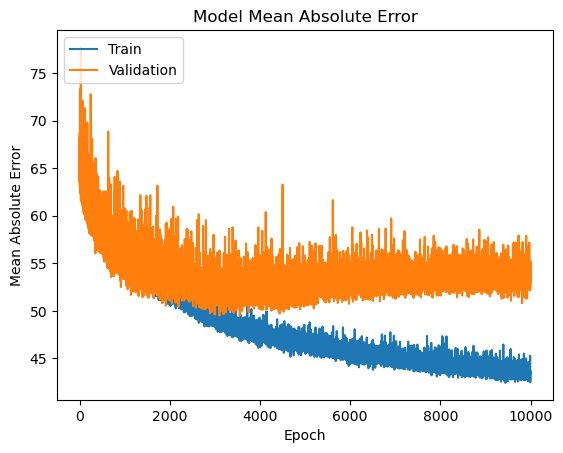

In [34]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [21]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Função para criar o modelo (mantém-se igual)
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=len(features), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

# Preparação dos dados de treino
X_train = train_data[features].values
y_train = train_data[target].values

# Validação cruzada de K-Folds
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
fold_no = 1
mae_scores = []

historicos = []  # Lista para armazenar o histórico de cada fold

for train, val in kfold.split(X_train, y_train):
    # Criar modelo para cada fold
    model = create_model()
    
    # Treinar modelo
    print(f'Treinando fold {fold_no}...')
    model.fit(X_train[train], y_train[train], epochs=100, batch_size=32, verbose=1)

    # Avaliar modelo no fold de validação
    scores = model.evaluate(X_train[val], y_train[val], verbose=0)
    print(f'Fold {fold_no} - Erro: {scores[0]} - Erro Absoluto Médio: {scores[1]}')
    mae_scores.append(scores[1])
    
    history = model.fit(X_train[train], y_train[train], epochs=100, batch_size=32, verbose=1)
    historicos.append(history)
    
    fold_no += 1

# Calcular a média do erro absoluto médio de todos os folds
average_mae = np.mean(mae_scores)
print(f'Média do Erro Absoluto Médio da Validação Cruzada: {average_mae}')

# Treinamento final do modelo no conjunto completo de treino
model = create_model()
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Avaliar o modelo no conjunto de teste
loss, metric = model.evaluate(X_test, y_test)
print("Mean Absolute Error no conjunto de teste:", metric)





Treinando fold 1...
Epoch 1/100


185/185 [==============================] - 1s 1ms/step - loss: 55227.2227 - mean_absolute_error: 158.0206
Epoch 2/100
185/185 [==============================] - 0s 1ms/step - loss: 18956.2832 - mean_absolute_error: 94.4610
Epoch 3/100
185/185 [==============================] - 0s 1ms/step - loss: 16424.5391 - mean_absolute_error: 85.3748
Epoch 4/100
185/185 [==============================] - 0s 970us/step - loss: 15250.5059 - mean_absolute_error: 80.7369
Epoch 5/100
185/185 [==============================] - 0s 921us/step - loss: 14803.9199 - mean_absolute_error: 78.9848
Epoch 6/100
185/185 [==============================] - 0s 950us/step - loss: 14266.5391 - mean_absolute_error: 76.3399
Epoch 7/100
185/185 [==============================] - 0s 868us/step - loss: 13943.5449 - mean_absolute_error: 74.8793
Epoch 8/100
185/185 [==============================] - 0s 916us/step - loss: 13641.8828 - mean_absolute_error: 73.5541
Epoch 9/100
185/185 [=======

Epoch 28/100
185/185 [==============================] - 0s 883us/step - loss: 10602.1260 - mean_absolute_error: 62.9216
Epoch 29/100
185/185 [==============================] - 0s 902us/step - loss: 10578.9395 - mean_absolute_error: 63.2132
Epoch 30/100
185/185 [==============================] - 0s 930us/step - loss: 10473.9883 - mean_absolute_error: 62.7064
Epoch 31/100
185/185 [==============================] - 0s 897us/step - loss: 10290.4209 - mean_absolute_error: 61.7541
Epoch 32/100
185/185 [==============================] - 0s 874us/step - loss: 10584.4951 - mean_absolute_error: 62.6278
Epoch 33/100
185/185 [==============================] - 0s 870us/step - loss: 10513.5420 - mean_absolute_error: 62.8714
Epoch 34/100
185/185 [==============================] - 0s 865us/step - loss: 10498.8076 - mean_absolute_error: 62.4208
Epoch 35/100
185/185 [==============================] - 0s 874us/step - loss: 10504.6904 - mean_absolute_error: 63.0583
Epoch 36/100
185/185 [==================

185/185 [==============================] - 0s 878us/step - loss: 11274.9375 - mean_absolute_error: 65.6142
Epoch 65/100
185/185 [==============================] - 0s 877us/step - loss: 11444.7520 - mean_absolute_error: 65.9382
Epoch 66/100
185/185 [==============================] - 0s 897us/step - loss: 11476.1904 - mean_absolute_error: 65.7466
Epoch 67/100
185/185 [==============================] - 0s 945us/step - loss: 11401.1836 - mean_absolute_error: 65.9324
Epoch 68/100
185/185 [==============================] - 0s 879us/step - loss: 11346.7207 - mean_absolute_error: 66.1966
Epoch 69/100
185/185 [==============================] - 0s 862us/step - loss: 11372.0977 - mean_absolute_error: 65.6716
Epoch 70/100
185/185 [==============================] - 0s 886us/step - loss: 11529.2090 - mean_absolute_error: 66.4809
Epoch 71/100
185/185 [==============================] - 0s 877us/step - loss: 11227.3828 - mean_absolute_error: 65.1817
Epoch 72/100
185/185 [==============================]

185/185 [==============================] - 0s 866us/step - loss: 10549.2959 - mean_absolute_error: 63.3485
Epoch 100/100
185/185 [==============================] - 0s 851us/step - loss: 10450.9219 - mean_absolute_error: 62.8565
Treinando fold 3...
Epoch 1/100
185/185 [==============================] - 1s 957us/step - loss: 21149.4277 - mean_absolute_error: 98.3170
Epoch 2/100
185/185 [==============================] - 0s 939us/step - loss: 15370.2451 - mean_absolute_error: 82.0340
Epoch 3/100
185/185 [==============================] - 0s 936us/step - loss: 14737.6221 - mean_absolute_error: 79.0310
Epoch 4/100
185/185 [==============================] - 0s 969us/step - loss: 13953.5225 - mean_absolute_error: 75.7455
Epoch 5/100
185/185 [==============================] - 0s 870us/step - loss: 14145.0605 - mean_absolute_error: 75.8156
Epoch 6/100
185/185 [==============================] - 0s 874us/step - loss: 13773.6641 - mean_absolute_error: 74.6780
Epoch 7/100
185/185 [=================

185/185 [==============================] - 0s 927us/step - loss: 10623.8477 - mean_absolute_error: 63.0876
Epoch 35/100
185/185 [==============================] - 0s 880us/step - loss: 10442.9365 - mean_absolute_error: 62.2990
Epoch 36/100
185/185 [==============================] - 0s 867us/step - loss: 10594.6709 - mean_absolute_error: 62.9465
Epoch 37/100
185/185 [==============================] - 0s 891us/step - loss: 10701.7100 - mean_absolute_error: 63.6878
Epoch 38/100
185/185 [==============================] - 0s 885us/step - loss: 10391.4336 - mean_absolute_error: 62.4510
Epoch 39/100
185/185 [==============================] - 0s 871us/step - loss: 10646.1611 - mean_absolute_error: 63.8774
Epoch 40/100
185/185 [==============================] - 0s 894us/step - loss: 10479.6367 - mean_absolute_error: 62.8506
Epoch 41/100
185/185 [==============================] - 0s 884us/step - loss: 10658.3281 - mean_absolute_error: 63.4349
Epoch 42/100
185/185 [==============================]

185/185 [==============================] - 0s 986us/step - loss: 11513.7158 - mean_absolute_error: 65.7359
Epoch 71/100
185/185 [==============================] - 0s 962us/step - loss: 11520.3760 - mean_absolute_error: 66.0061
Epoch 72/100
185/185 [==============================] - 0s 897us/step - loss: 11601.6455 - mean_absolute_error: 65.8752
Epoch 73/100
185/185 [==============================] - 0s 897us/step - loss: 11601.4590 - mean_absolute_error: 65.9486
Epoch 74/100
185/185 [==============================] - 0s 902us/step - loss: 11905.8945 - mean_absolute_error: 67.3872
Epoch 75/100
185/185 [==============================] - 0s 901us/step - loss: 11578.3418 - mean_absolute_error: 65.6897
Epoch 76/100
185/185 [==============================] - 0s 891us/step - loss: 11575.7949 - mean_absolute_error: 66.1920
Epoch 77/100
185/185 [==============================] - 0s 889us/step - loss: 11751.2607 - mean_absolute_error: 66.3147
Epoch 78/100
185/185 [==============================]

185/185 [==============================] - 0s 881us/step - loss: 13830.0293 - mean_absolute_error: 76.2085
Epoch 6/100
185/185 [==============================] - 0s 877us/step - loss: 13379.8115 - mean_absolute_error: 73.9264
Epoch 7/100
185/185 [==============================] - 0s 903us/step - loss: 13063.1846 - mean_absolute_error: 72.3668
Epoch 8/100
185/185 [==============================] - 0s 881us/step - loss: 12787.6104 - mean_absolute_error: 71.3996
Epoch 9/100
185/185 [==============================] - 0s 878us/step - loss: 12657.0195 - mean_absolute_error: 70.9834
Epoch 10/100
185/185 [==============================] - 0s 876us/step - loss: 12751.7949 - mean_absolute_error: 71.4313
Epoch 11/100
185/185 [==============================] - 0s 881us/step - loss: 12304.6592 - mean_absolute_error: 69.7639
Epoch 12/100
185/185 [==============================] - 0s 867us/step - loss: 12547.2969 - mean_absolute_error: 70.9068
Epoch 13/100
185/185 [==============================] - 0

Epoch 41/100
185/185 [==============================] - 0s 1ms/step - loss: 10310.3994 - mean_absolute_error: 63.1952
Epoch 42/100
185/185 [==============================] - 0s 1ms/step - loss: 10138.4844 - mean_absolute_error: 62.4538
Epoch 43/100
185/185 [==============================] - 0s 968us/step - loss: 10135.8271 - mean_absolute_error: 62.2630
Epoch 44/100
185/185 [==============================] - 0s 958us/step - loss: 10164.4102 - mean_absolute_error: 62.6175
Epoch 45/100
185/185 [==============================] - 0s 891us/step - loss: 10176.2393 - mean_absolute_error: 62.1654
Epoch 46/100
185/185 [==============================] - 0s 943us/step - loss: 10198.2393 - mean_absolute_error: 62.8326
Epoch 47/100
185/185 [==============================] - 0s 954us/step - loss: 10113.1416 - mean_absolute_error: 62.5241
Epoch 48/100
185/185 [==============================] - 0s 897us/step - loss: 10314.9248 - mean_absolute_error: 63.4651
Epoch 49/100
185/185 [======================

185/185 [==============================] - 0s 902us/step - loss: 11405.1914 - mean_absolute_error: 66.0362
Epoch 78/100
185/185 [==============================] - 0s 851us/step - loss: 11418.3281 - mean_absolute_error: 66.4412
Epoch 79/100
185/185 [==============================] - 0s 856us/step - loss: 11364.7881 - mean_absolute_error: 66.2419
Epoch 80/100
185/185 [==============================] - 0s 886us/step - loss: 11232.0811 - mean_absolute_error: 65.4289
Epoch 81/100
185/185 [==============================] - 0s 854us/step - loss: 11560.0215 - mean_absolute_error: 66.8918
Epoch 82/100
185/185 [==============================] - 0s 853us/step - loss: 11327.8584 - mean_absolute_error: 65.9545
Epoch 83/100
185/185 [==============================] - 0s 863us/step - loss: 11438.5381 - mean_absolute_error: 66.4291
Epoch 84/100
185/185 [==============================] - 0s 894us/step - loss: 11137.9658 - mean_absolute_error: 64.9080
Epoch 85/100
185/185 [==============================]

185/185 [==============================] - 0s 989us/step - loss: 12874.0166 - mean_absolute_error: 70.2854
Epoch 13/100
185/185 [==============================] - 0s 962us/step - loss: 13019.1602 - mean_absolute_error: 71.4956
Epoch 14/100
185/185 [==============================] - 0s 1ms/step - loss: 12758.3086 - mean_absolute_error: 69.8003
Epoch 15/100
185/185 [==============================] - 0s 973us/step - loss: 12897.5430 - mean_absolute_error: 70.2280
Epoch 16/100
185/185 [==============================] - 0s 968us/step - loss: 12858.8613 - mean_absolute_error: 70.4277
Epoch 17/100
185/185 [==============================] - 0s 998us/step - loss: 12581.4316 - mean_absolute_error: 69.0765
Epoch 18/100
185/185 [==============================] - 0s 960us/step - loss: 12836.6152 - mean_absolute_error: 71.0833
Epoch 19/100
185/185 [==============================] - 0s 954us/step - loss: 12396.7412 - mean_absolute_error: 68.4894
Epoch 20/100
185/185 [==============================] -

185/185 [==============================] - 0s 973us/step - loss: 10442.4111 - mean_absolute_error: 62.2308
Epoch 49/100
185/185 [==============================] - 0s 937us/step - loss: 10317.6787 - mean_absolute_error: 61.6129
Epoch 50/100
185/185 [==============================] - 0s 985us/step - loss: 10381.4502 - mean_absolute_error: 62.1018
Epoch 51/100
185/185 [==============================] - 0s 1ms/step - loss: 10377.6670 - mean_absolute_error: 62.1894
Epoch 52/100
185/185 [==============================] - 0s 1ms/step - loss: 10451.7412 - mean_absolute_error: 62.4864
Epoch 53/100
185/185 [==============================] - 0s 1ms/step - loss: 10256.2178 - mean_absolute_error: 61.9331
Epoch 54/100
185/185 [==============================] - 0s 987us/step - loss: 10296.2129 - mean_absolute_error: 61.8683
Epoch 55/100
185/185 [==============================] - 0s 935us/step - loss: 10316.3770 - mean_absolute_error: 62.0192
Epoch 56/100
185/185 [==============================] - 0s 

185/185 [==============================] - 0s 951us/step - loss: 11053.1064 - mean_absolute_error: 64.4627
Epoch 85/100
185/185 [==============================] - 0s 975us/step - loss: 11077.9766 - mean_absolute_error: 64.5291
Epoch 86/100
185/185 [==============================] - 0s 957us/step - loss: 10951.7705 - mean_absolute_error: 64.4043
Epoch 87/100
185/185 [==============================] - 0s 960us/step - loss: 11063.1357 - mean_absolute_error: 64.7327
Epoch 88/100
185/185 [==============================] - 0s 959us/step - loss: 11283.4805 - mean_absolute_error: 65.2041
Epoch 89/100
185/185 [==============================] - 0s 1ms/step - loss: 10939.6094 - mean_absolute_error: 64.0961
Epoch 90/100
185/185 [==============================] - 0s 1ms/step - loss: 10850.6875 - mean_absolute_error: 64.6270
Epoch 91/100
185/185 [==============================] - 0s 920us/step - loss: 10916.2012 - mean_absolute_error: 63.8433
Epoch 92/100
185/185 [==============================] - 0

185/185 [==============================] - 0s 904us/step - loss: 12490.5664 - mean_absolute_error: 70.1382
Epoch 20/100
185/185 [==============================] - 0s 868us/step - loss: 12400.1221 - mean_absolute_error: 70.0500
Epoch 21/100
185/185 [==============================] - 0s 916us/step - loss: 12510.3301 - mean_absolute_error: 70.6401
Epoch 22/100
185/185 [==============================] - 0s 887us/step - loss: 12684.7168 - mean_absolute_error: 70.9898
Epoch 23/100
185/185 [==============================] - 0s 891us/step - loss: 12543.8320 - mean_absolute_error: 70.1527
Epoch 24/100
185/185 [==============================] - 0s 865us/step - loss: 12528.4189 - mean_absolute_error: 70.3391
Epoch 25/100
185/185 [==============================] - 0s 859us/step - loss: 12260.7871 - mean_absolute_error: 69.2742
Epoch 26/100
185/185 [==============================] - 0s 859us/step - loss: 12238.3838 - mean_absolute_error: 69.0850
Epoch 27/100
185/185 [==============================]

185/185 [==============================] - 0s 893us/step - loss: 10506.6611 - mean_absolute_error: 62.6628
Epoch 55/100
185/185 [==============================] - 0s 867us/step - loss: 10633.4424 - mean_absolute_error: 62.5253
Epoch 56/100
185/185 [==============================] - 0s 866us/step - loss: 10669.9961 - mean_absolute_error: 63.1523
Epoch 57/100
185/185 [==============================] - 0s 923us/step - loss: 10856.0234 - mean_absolute_error: 64.0044
Epoch 58/100
185/185 [==============================] - 0s 881us/step - loss: 10458.0312 - mean_absolute_error: 62.3616
Epoch 59/100
185/185 [==============================] - 0s 870us/step - loss: 10508.8770 - mean_absolute_error: 62.9176
Epoch 60/100
185/185 [==============================] - 0s 898us/step - loss: 10484.9150 - mean_absolute_error: 62.2374
Epoch 61/100
185/185 [==============================] - 0s 964us/step - loss: 10534.1611 - mean_absolute_error: 62.8562
Epoch 62/100
185/185 [==============================]

185/185 [==============================] - 0s 909us/step - loss: 11062.6113 - mean_absolute_error: 64.4072
Epoch 91/100
185/185 [==============================] - 0s 900us/step - loss: 11184.8350 - mean_absolute_error: 65.5877
Epoch 92/100
185/185 [==============================] - 0s 891us/step - loss: 11023.5225 - mean_absolute_error: 63.9098
Epoch 93/100
185/185 [==============================] - 0s 888us/step - loss: 11131.1543 - mean_absolute_error: 64.8995
Epoch 94/100
185/185 [==============================] - 0s 921us/step - loss: 11022.6514 - mean_absolute_error: 64.6096
Epoch 95/100
185/185 [==============================] - 0s 886us/step - loss: 11059.1250 - mean_absolute_error: 65.1072
Epoch 96/100
185/185 [==============================] - 0s 897us/step - loss: 10974.7764 - mean_absolute_error: 64.4011
Epoch 97/100
185/185 [==============================] - 0s 878us/step - loss: 10831.1230 - mean_absolute_error: 63.4635
Epoch 98/100
185/185 [==============================]

Epoch 25/100
205/205 [==============================] - 0s 923us/step - loss: 12593.7510 - mean_absolute_error: 70.1653
Epoch 26/100
205/205 [==============================] - 0s 897us/step - loss: 12451.9824 - mean_absolute_error: 69.2674
Epoch 27/100
205/205 [==============================] - 0s 920us/step - loss: 12436.6582 - mean_absolute_error: 69.9734
Epoch 28/100
205/205 [==============================] - 0s 885us/step - loss: 12327.7139 - mean_absolute_error: 69.0726
Epoch 29/100
205/205 [==============================] - 0s 877us/step - loss: 12285.2646 - mean_absolute_error: 68.6541
Epoch 30/100
205/205 [==============================] - 0s 1ms/step - loss: 12385.6357 - mean_absolute_error: 68.7158
Epoch 31/100
205/205 [==============================] - 0s 998us/step - loss: 12285.0654 - mean_absolute_error: 68.4643
Epoch 32/100
205/205 [==============================] - 0s 1ms/step - loss: 12497.8242 - mean_absolute_error: 70.1311
Epoch 33/100
205/205 [======================

KeyError: 'val_loss'

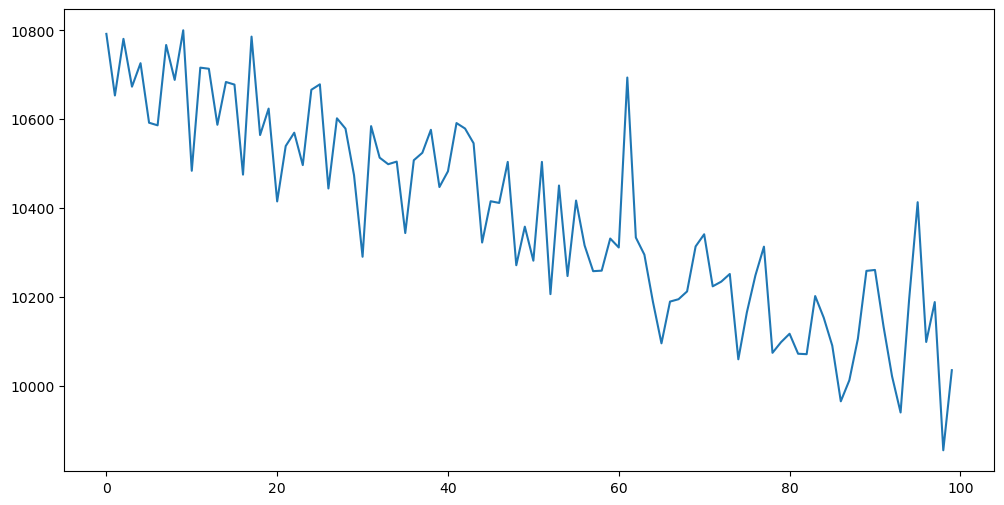

In [22]:
for i, history in enumerate(historicos):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Treino')
    plt.plot(history.history['val_loss'], label='Validação')
    plt.title(f'Fold {i+1} - Erro ao Longo das Épocas')
    plt.ylabel('Erro')
    plt.xlabel('Época')
    plt.legend()
    plt.show()

Epoch 1/100
205/205 [==============================] - 0s 1ms/step - loss: 11081.4170 - mean_absolute_error: 64.7342
Epoch 2/100
205/205 [==============================] - 0s 868us/step - loss: 10801.8857 - mean_absolute_error: 64.0374
Epoch 3/100
205/205 [==============================] - 0s 885us/step - loss: 10855.8936 - mean_absolute_error: 63.8751
Epoch 4/100
205/205 [==============================] - 0s 879us/step - loss: 10792.7646 - mean_absolute_error: 63.6303
Epoch 5/100
205/205 [==============================] - 0s 871us/step - loss: 10710.4609 - mean_absolute_error: 63.8877
Epoch 6/100
205/205 [==============================] - 0s 901us/step - loss: 11031.6172 - mean_absolute_error: 64.8570
Epoch 7/100
205/205 [==============================] - 0s 972us/step - loss: 10654.8818 - mean_absolute_error: 62.9937
Epoch 8/100
205/205 [==============================] - 0s 940us/step - loss: 10730.8076 - mean_absolute_error: 63.6928
Epoch 9/100
205/205 [=============================

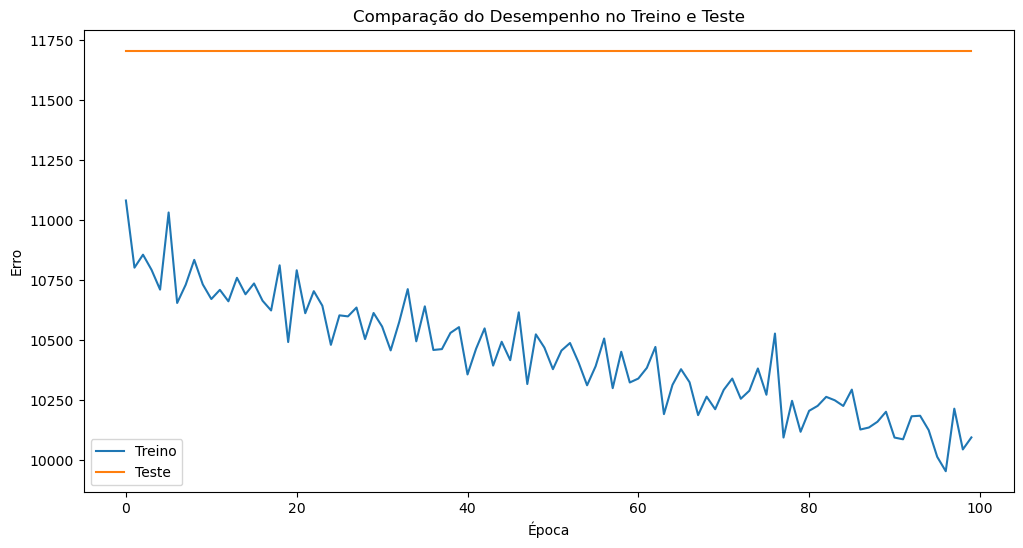

In [23]:
# Treinamento final e avaliação no conjunto de teste
final_history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
final_loss, final_metric = model.evaluate(X_test, y_test)

# Plotar gráfico de desempenho
plt.figure(figsize=(12, 6))
plt.plot(final_history.history['loss'], label='Treino')
plt.plot(np.arange(len(final_history.history['loss'])), [final_loss]*len(final_history.history['loss']), label='Teste')
plt.title('Comparação do Desempenho no Treino e Teste')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.legend()
plt.show()

In [25]:
pip install deap

     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.1 MB 330.3 kB/s eta 0:00:04
     ------- -------------------------------- 0.2/1.1 MB 1.6 MB/s eta 0:00:01
     ----------------------------- ---------- 0.8/1.1 MB 4.5 MB/s eta 0:00:01
     ---------------------------------------  1.1/1.1 MB 5.2 MB/s eta 0:00:01
     ---------------------------------------  1.1/1.1 MB 5.2 MB/s eta 0:00:01
     ---------------------------------------  1.1/1.1 MB 5.2 MB/s eta 0:00:01
     ---------------------------------------  1.1/1.1 MB 5.2 MB/s eta 0:00:01
     ---------------------------------------  1.1/1.1 MB 5.2 MB/s eta 0:00:01
     ---------------------------------------  1.1/1.1 MB 5.2 MB/s eta 0:00:01
     ---------------------------------------  1.1/1.1 MB 5.2 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 2.1 MB/s eta 0:00:0

In [27]:
import random
from deap import base, creator, tools
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def evaluateModel(individual):
    # Criar modelo com a topologia definida pelo indivíduo
    model = Sequential()
    for neurons in individual:
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1))  # Camada de saída
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Validação cruzada
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    mae_scores = []
    for train, val in kfold.split(X_train, y_train):
        model.fit(X_train[train], y_train[train], epochs=50, batch_size=32, verbose=0)
        y_pred = model.predict(X_train[val])
        mae = mean_absolute_error(y_train[val], y_pred)
        mae_scores.append(mae)
    return (np.mean(mae_scores),)  # Retornar um tuple com um único valor

# Definir algoritmo genético
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_neuron", random.randint, 8, 32)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_neuron, n=3)  # Começar com 3 camadas
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluateModel)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=8, up=32, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# Criar população inicial
population = toolbox.population(n=50)

# Parâmetros do algoritmo genético
NGEN = 10
CXPB, MUTPB = 0.5, 0.2

# Algoritmo genético
for gen in range(NGEN):
    offspring = tools.selTournament(population, len(population), tournsize=3)
    offspring = list(map(toolbox.clone, offspring))

    # Aplicar crossover e mutação
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # Avaliar indivíduos com fitness inválida
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    population[:] = offspring

# Extrair e imprimir os melhores indivíduos
top10 = tools.selBest(population, k=10)
print("Top 10 Modelos:")
for ind in top10:
    print(ind, ind.fitness.values)


C:\Users\jairo\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\jairo\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


21/21 [==============================] - 0s 775us/step


21/21 [==============================] - 0s 775us/step


21/21 [==============================] - 0s 900us/step


21/21 [==============================] - 0s 800us/step


21/21 [==============================] - 0s 946us/step


21/21 [==============================] - 0s 750us/step


21/21 [==============================] - 0s 700us/step


21/21 [==============================] - 0s 750us/step


21/21 [==============================] - 0s 750us/step


21/21 [==============================] - 0s 726us/step


21/21 [==============================] - 0s 950us/step


21/21 [==============================] - 0s 750us/step


21/21 [==============================] - 0s 750us/step
Top 10 Modelos:
[29, 26, 28] (59.05847644614181,)
[29, 26, 28] (59.05847644614181,)
[29, 26, 28] (59.05847644614181,)
[28, 26, 22] (59.342149740705295,)
[29, 26, 32] (59.60774614064725,)
[25, 27, 28] (59.62825060504222,)
[25, 27, 28] (59.62825060504222,)
[25, 27, 28] (59.62825060504222,)
[29, 26, 32] (59.73540829179767,)
[29, 27, 32] (59.75174774032293,)
